**Note before we get started** : When working with jupyter notebooks, use the same directory of the datasets has the notebook.

In [79]:
pwd # The working directory is the same has the one where the workbook is lockated.

'/Users/annick/OneDrive/Documents/2. Data analysis and research/1. Data_Analysis_and_Interpretation/0. Python_Working_Directory'

# TABLE OF CONTENT


### 1. Data analysis and visualisation
### 2. Data analysis tools
### 3. Regression modeling
### 4. Machine Learning for Data Analysis



# PART 1. DATA ANALYSIS AND VISUALISATION


# Introduction

The data set that I have chosen
I will be working with the “Outlook on Life Surveys”, 2012 data set.


### Brief literature review

In the literature it is expected that income changes are significantly affected by employment status, family composition, permanent income, and past expectations. In a 1999 study in the Netherlands, researchers found that those with higher permanent incomes generally have higher expected income growth than others, indicating that the expected income pattern over the life cycle depends on permanent income (Das & van Soest, 1999). Other studies conducted in China found that there is a inconsistent relationship between income and subjective wellbeing; and in previous cross-sectional and panel studies; argue that income only significantly impacts well-being if it reflects differences in permanent income (Cai & Park, 2016). We would like to conduct some of these studies but in regards to the US economy. We thus anticipate that there is a positive relationship between an optimistic outlook on the economy and the income level of an household. Are hypothesis are presented bellow.

### The association I would like to study and the research question

I am interested in the association between the perception of the nation’s economic situation in different income groups.

#### The research question is :

Compare to one year ago, is the perception of the US economy associated with the income level groups in the US?
More specifically my research questions are has followed:

“To what extent is the perception of the us economic situation (W1_G2) associated with the level of income (W1_P20)?”
Does the perception of the us economic situation vary among different income levels?
I have used these terms in ScienceDirect to have a feel of the literature ("expectation economic outlook" and "household income").

#### The hypothesis

We anticipate that the relationship between the perception of the us economic situation is positively correlated with the household income; in the sense that the more an individual has a high level of income, the more likely they will have a positive outcome on the economic situation of the us economy.

At the lower level of income, it can be anticipated that there will be a greater proportion of individual who will consider that the us economy is doing worse.

# Data analysis

## Loading the required Python packages for data analysis

We will start by importing the required packages for data analysis in Python.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

1. **NumPy**: Provides a fast numerical array structure and helper functions.
2. **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
3. **scikit-learn**: The essential Machine Learning package in Python.
4. **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
5. **Seaborn**: Advanced statistical plotting library.
6. **statsmodels.formula.api** : provides classes and functions for the estimation of many different statistical models.
7. **scipy.stats** : contains a large number of probability distributions as well as a growing library of statistical functions.

In [80]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns  # for plots
import matplotlib.pyplot as plt  # as plt is sort of a nickname for the library because it is too long.
import statsmodels.formula.api as smf  # statsmodels
import statsmodels.stats.multicomp as multi  # statsmodels and posthoc test
import statsmodels.api as sm  # Statsmodel for the qqplots
import scipy.stats  # For the Chi-Square test of independance

# 
import os 

# Machine learning
# Libraries for decision trees

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics



import graphviz

In [81]:
# IMPORTANT BUG FIXS !!!

# Because, by default, the Pandas library often displays an abbreviated list of rows and columns
# from our data frame. We are going to add additional set option statements following the library import syntax 
# that requests a display of the maximum number of rows and columns. 

# The default in Python, limits this display to a subset of the data frame, 
# and so including display, max, columns, or rows, none, removes that limit 
# and allows all rows and columns to be displayed.

# Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)
# Set PANDAS to show all rows in DataFrame
pd.set_option('display.max_rows', None)

# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

In [82]:
# Importing the data set
df = pd.read_csv("ool_pds.csv", low_memory = False)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Columns: 436 entries, CASEID to PPNET
dtypes: float64(3), int64(238), object(195)
memory usage: 7.6+ MB


In [84]:
# Head of the data set
df.head(5)

,CASEID,W1_CASEID,W2_CASEID2,W1_TM_START,W1_TM_FINISH,W1_WEIGHT1,W1_WEIGHT2,W1_WEIGHT3,W2_TM_START,W2_TM_FINISH,W2_DURATION,W2_QFLAG,W2_WEIGHT1,W2_WEIGHT2,W2_WEIGHT3,W1_A1,W1_A2,W1_A4,W1_A5A,W1_A5A_OTHER_TEXT,W1_A5B,W1_A5B_OTHER_TEXT,W1_A10,W1_A11,W1_A12,W1_A12A,W1_B1,W1_B2,W1_B3,W1_B4,W1_C1,W1_C1_OTHER_TEXT,W1_C1B,W1_C1C,W1_C2,W1_D1,W1_D2,W1_D3,W1_D4,W1_D5,W1_D6,W1_D7,W1_D8,W1_D9,W1_D10,W1_D11,W1_D12,W1_D13,W1_D14,W1_D15,W1_D16,W1_D17,W1_D18,W1_D19,W1_D20,W1_E1,W1_E2,W1_E2A,W1_E3,W1_E4,W1_E5_1,W1_E5_2,W1_E5_3,W1_E5_4,W1_E5_5,W1_E5_6,W1_E5_7,W1_E61_A,W1_E61_B,W1_E61_C,W1_E61_D,W1_E62_A,W1_E62_B,W1_E62_C,W1_E62_D,W1_E63_A,W1_E63_B,W1_E63_C,W1_E63_D,W1_E64_A,W1_E64_B,W1_E64_C,W1_E64_D,W1_E7,W1_E8,W1_E9_A,W1_E9_B,W1_E9_C,W1_E9_D,W1_E9_REFUSED,W1_F1,W1_F1A,W1_F2,W1_F2A,W1_F3,W1_F4_A,W1_F4_B,W1_F4_C,W1_F4_D,W1_F4_E,W1_F5_A,W1_F5_B,W1_F5_C,W1_F5_D,W1_F5_E,W1_F6,W1_G2,W1_G2B,W1_G2C,W1_G3A,W1_G3B,W1_G3C,W1_H1,W1_H2,W1_H3,W1_H4,W1_H5,W1_H6,W1_H7,W1_H8,W1_I1,W1_I2,W1_J1_A,W1_J1_B,W1_J1_C,W1_J1_D,W1_J1_E,W1_J1_F,W1_J1_G,W1_J2,W1_J3A_A,W1_J3A_B,W1_J3A_C,W1_K1_A,W1_K1_B,W1_K1_C,W1_K1_D,W1_K4,W1_K5,W1_L1_A,W1_L1_B,W1_L1_C,W1_L2_1,W1_L2_2,W1_L2_3,W1_L2_4,W1_L2_5,W1_L2_REFUSED,W1_L3,W1_L4_A,W1_L4_B,W1_L4_C,W1_L4_D,W1_L5_A,W1_L5_B,W1_L5_C,W1_L5_D,W1_L5_E,W1_L5_F,W1_M1,W1_M1_OTHER_TEXT,W1_M1A,W1_M5,W1_M2,W1_M3,W1_M4,W1_M6,W1_M7,W1_M8,W1_M9,W1_M10,W1_M11,W1_M12,W1_N1A,W1_N1B,W1_N1C,W1_N1D,W1_N1E,W1_N1F,W1_N1G,W1_N1H,W1_N1I,W1_N1J,W1_N1K,W1_N1L,W1_N1M,W1_N1N,W1_O1,W1_O3,W1_O4,W1_O5,W1_P2,W1_P3,W1_P4,W1_P4_OTHER_TEXT,W1_P5,W1_P5A,W1_P6,W1_P8,W1_P9,W1_P10,W1_P11,W1_P13,W1_P13A,W1_P13B,W1_P13B_TEXT,W1_P14,W1_P15,W1_P16A,W1_P16B,W1_P16C,W1_P16D,W1_P16E,W1_P16F,W1_P16G,W1_P16H,W1_P16I,W1_P16J,W1_P16K,W1_P16L,W1_P16M,W1_P16_REFUSED,W1_P17,W1_P17A,W1_P18,W1_P19,W1_P20,W1_P21,W1_ORDER_Q1,W1_Q1_A,W1_Q1_B,W1_QA1,W1_QA2,W1_QA2A,W1_QA4A,W1_QA4B,W1_QA4C,W1_QA5D,W1_QA6,W1_QB1,W1_QB2,W1_QB2A,W1_QB3,W1_QB3A,W1_ORDER_M13,W1_M13_A,W1_M13_B,W1_M13_C,W1_M13_D,W2_QB1A,W2_QB1B,W2_QB1C,W2_QB1D,W2_QB1D_TEXT,W2_QB2A,W2_QB2B,W2_QB3,W2_QE1,W2_QE1A,W2_QE2,W2_QE2A,W2_QE3,W2_QF1A,W2_QF1B,W2_QF1C,W2_QF1D,W2_QF2A,W2_QF2B,W2_QF2C,W2_QF2D,W2_QF3A,W2_QF3B,W2_QF3C,W2_QF3D,W2_QF4A,W2_QF4B,W2_QF4C,W2_QF4D,W2_QF5A,W2_QF5B,W2_QF5C,W2_QF5D,W2_QF6A,W2_QF6B,W2_QF6C,W2_QF6D,W2_QF7A,W2_QF7B,W2_QF7C,W2_QF7D,W2_QF8,W2_QF9,W2_QF10A,W2_QF10B,W2_QF10C,W2_QF10D,W2_QG_1,W2_QG_2,W2_QG_3,W2_QH1,W2_QH2,W2_QH2A,W2_QI1,W2_QI2,W2_QI3,W2_QI4_A,W2_QI4_B,W2_QI4_C,W2_QI4_D,W2_QDISP11,W2_J1_A,W2_J1_B,W2_J1_C,W2_J1_D,W2_QK1,W2_QK2,W2_QK3,W2_QK3A,W2_QL1A,W2_QL1B,W2_QL2A,W2_QL2B,W2_QL2C,W2_QL3,W2_QL4,W2_QM8,W2_QM9,W2_QM10,W2_QM11,W2_QM12,W2_QN1,W2_QN2,W2_QN3,W2_QN4,W2_QO1,W2_QO2,W2_QO3,W1_ORDER_A1,W1_ORDER_A2,W1_ORDER_A12,W1_ORDER_B1,W1_ORDER_B2,W1_ORDER_B3,W1_ORDER_B4,W1_ORDER_C2,W1_ORDER_E2,W1_ORDER_E2A,W1_ORDER_F1,W1_ORDER_F1A,W1_ORDER_F2,W1_ORDER_F2A,W1_ORDER_F3,W1_ORDER_F4,W1_ORDER_F5,W1_ORDER_G2,W1_ORDER_G3A,W1_ORDER_H1,W1_ORDER_I1,W1_ORDER_J1,W1_ORDER_J3A,W1_ORDER_K1,W1_ORDER_L4_A,W1_ORDER_L4_B,W1_ORDER_L4_C,W1_ORDER_L4_D,W1_ORDER_L5_A,W1_ORDER_L5_B,W1_ORDER_L5_C,W1_ORDER_L5_D,W1_ORDER_L5_E,W1_ORDER_L5_F,W1_ORDER_M3,W1_ORDER_O1,W2_ORDER_QB3_1,W2_ORDER_QB3_2,W2_ORDER_QB3_3,W2_ORDER_QB3_4,W2_ORDER_QE1A,W2_ORDER_QE2A,W2_ORDER_QF1_A,W2_ORDER_QF1_B,W2_ORDER_QF1_C,W2_ORDER_QF1_D,W2_ORDER_QF2_A,W2_ORDER_QF2_B,W2_ORDER_QF2_C,W2_ORDER_QF2_D,W2_ORDER_QF3_A,W2_ORDER_QF3_B,W2_ORDER_QF3_C,W2_ORDER_QF3_D,W2_ORDER_QF4_A,W2_ORDER_QF4_B,W2_ORDER_QF4_C,W2_ORDER_QF4_D,W2_ORDER_QF5_A,W2_ORDER_QF5_B,W2_ORDER_QF5_C,W2_ORDER_QF5_D,W2_ORDER_QF6_A,W2_ORDER_QF6_B,W2_ORDER_QF6_C,W2_ORDER_QF6_D,W2_ORDER_QF7_A,W2_ORDER_QF7_B,W2_ORDER_QF7_C,W2_ORDER_QF7_D,W2_ORDER_QF10_A,W2_ORDER_QF10_B,W2_ORDER_QF10_C,W2_ORDER_QF10_D,W2_ORDER_M10_M11,PPAGE,PPAGECAT,PPAGECT4,PPEDUC,PPEDUCAT,PPETHM,PPGENDER,PPHHHEAD,PPHHSIZE,PPHOUSE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPRENT,PPSTATEN,PPT01,PPT1317,PPT18OV,PPT25,PPT612,PPWORK,PPNET
0,1,2,820,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,4.855900,2.418100,2.331500,BLANKED F

In [85]:
# Let's look at the type of the variables in the dataset
df.dtypes

CASEID                 int64
W1_CASEID              int64
W2_CASEID2            object
W1_TM_START           object
W1_TM_FINISH          object
W1_WEIGHT1           float64
W1_WEIGHT2           float64
W1_WEIGHT3           float64
W2_TM_START           object
W2_TM_FINISH          object
W2_DURATION           object
W2_QFLAG              object
W2_WEIGHT1            object
W2_WEIGHT2            object
W2_WEIGHT3            object
W1_A1                  int64
W1_A2                  int64
W1_A4                  int64
W1_A5A                object
W1_A5A_OTHER_TEXT     object
W1_A5B                object
W1_A5B_OTHER_TEXT     object
W1_A10                 int64
W1_A11                 int64
W1_A12                 int64
W1_A12A               object
W1_B1                  int64
W1_B2                  int64
W1_B3                  int64
W1_B4                  int64
W1_C1                  int64
W1_C1_OTHER_TEXT      object
W1_C1B                object
W1_C1C                object
W1_C2         

In [86]:
# Determining the number of rows and columns in the dataset
print("This is the number of observations in the dataset:")
print(len(df))            # Number of observations = rows

print("This is the number of variables in the dataset:")
print(len(df.columns))    # Number of variables = columns

This is the number of observations in the dataset:
2294
This is the number of variables in the dataset:
436


In [87]:
# Because Python is treating the variables has string instead of numeric variables
# we will convert them as numeric with the following function

df["W1_G2"] = pd.to_numeric(df["W1_G2"])
df[("W1_P20")] = pd.to_numeric(df["W1_P20"])
df[("W1_F1")] = pd.to_numeric(df["W1_F1"])

# 1. The data analytic question
To what extent is the perception of the US economic situation associated with the level of income?

To ansew the question, we will use these variables from the dataset :

 - W1_P20: is the Personnal Annual income
 - W1_G2: is the US economy's situation
 - W1_F1: is the Percentage of how the respondants think about the future

# 2. Exploratory data analysis

## 2.1. Basic descriptive statistics

Let's start by printing out some summary statistics about the data set.

In [88]:
df.describe()

,CASEID,W1_CASEID,W1_WEIGHT1,W1_WEIGHT2,W1_WEIGHT3,W1_A1,W1_A2,W1_A4,W1_A10,W1_A11,W1_A12,W1_B1,W1_B2,W1_B3,W1_B4,W1_C1,W1_C2,W1_D1,W1_D2,W1_D3,W1_D4,W1_D5,W1_D6,W1_D7,W1_D8,W1_D9,W1_D10,W1_D11,W1_D12,W1_D13,W1_D14,W1_D15,W1_D16,W1_D17,W1_D18,W1_D19,W1_D20,W1_E1,W1_E3,W1_E61_A,W1_E61_B,W1_E61_C,W1_E61_D,W1_E62_A,W1_E62_B,W1_E62_C,W1_E62_D,W1_E63_A,W1_E63_B,W1_E63_C,W1_E63_D,W1_E64_A,W1_E64_B,W1_E64_C,W1_E64_D,W1_E7,W1_E9_A,W1_E9_B,W1_E9_C,W1_E9_D,W1_E9_REFUSED,W1_F1,W1_F2,W1_F3,W1_F4_A,W1_F4_B,W1_F4_C,W1_F4_D,W1_F4_E,W1_F5_A,W1_F5_B,W1_F5_C,W1_F5_D,W1_F5_E,W1_F6,W1_G2,W1_G3A,W1_H1,W1_H2,W1_H3,W1_H4,W1_H5,W1_H6,W1_H7,W1_H8,W1_I1,W1_I2,W1_J1_A,W1_J1_B,W1_J1_C,W1_J1_D,W1_J1_E,W1_J1_F,W1_J1_G,W1_J2,W1_J3A_A,W1_J3A_B,W1_J3A_C,W1_K1_A,W1_K1_B,W1_K1_C,W1_K1_D,W1_K4,W1_K5,W1_L1_A,W1_L1_B,W1_L1_C,W1_L2_1,W1_L2_2,W1_L2_3,W1_L2_4,W1_L2_5,W1_L2_REFUSED,W1_L3,W1_L4_A,W1_L4_B,W1_L4_C,W1_L4_D,W1_L5_A,W1_L5_B,W1_L5_C,W1_L5_D,W1_L5_E,W1_L5_F,W1_M1,W1_M1A,W1_M5,W1_M3,W1_M4,W1_N1A,W1_N1B,W1_N1C,W1_N1D,W1_N1E,W1_N1F,W1_N1G,W1_N1H,W1_N1I,W1_N1J,W1_N1K,W1_N1L,W1_N1M,W1_N1N,W1_O1,W1_O3,W1_O4,W1_O5,W1_P2,W1_P3,W1_P4,W1_P5,W1_P5A,W1_P6,W1_P8,W1_P9,W1_P10,W1_P11,W1_P13,W1_P14,W1_P15,W1_P16A,W1_P16B,W1_P16C,W1_P16D,W1_P16E,W1_P16F,W1_P16G,W1_P16H,W1_P16I,W1_P16J,W1_P16K,W1_P16L,W1_P16M,W1_P16_REFUSED,W1_P17,W1_P20,W1_P21,W1_ORDER_Q1,W1_Q1_A,W1_Q1_B,W1_ORDER_M13,W1_ORDER_A1,W1_ORDER_A2,W1_ORDER_A12,W1_ORDER_B1,W1_ORDER_B2,W1_ORDER_B3,W1_ORDER_B4,W1_ORDER_C2,W1_ORDER_E2,W1_ORDER_E2A,W1_ORDER_F1,W1_ORDER_F1A,W1_ORDER_F2,W1_ORDER_F2A,W1_ORDER_F3,W1_ORDER_F4,W1_ORDER_F5,W1_ORDER_G2,W1_ORDER_G3A,W1_ORDER_H1,W1_ORDER_I1,W1_ORDER_J1,W1_ORDER_J3A,W1_ORDER_K1,W1_ORDER_L4_A,W1_ORDER_L4_B,W1_ORDER_L4_C,W1_ORDER_L4_D,W1_ORDER_L5_A,W1_ORDER_L5_B,W1_ORDER_L5_C,W1_ORDER_L5_D,W1_ORDER_L5_E,W1_ORDER_L5_F,W1_ORDER_M3,W1_ORDER_O1,PPAGE,PPAGECAT,PPAGECT4,PPEDUC,PPEDUCAT,PPETHM,PPGENDER,PPHHHEAD,PPHHSIZE,PPHOUSE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPRENT,PPSTATEN,PPT01,PPT1317,PPT18OV,PPT25,PPT612,PPWORK,PPNET
count,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2

## Tables for our variables of interest

** Basic descriptive univariate data analysis**

For our explatory data analysis, let's start with one variable at a time.
Univariate analysis for some of the variables of the dataset (counts and frequencies);

The output that displays three of the variable as frequency tables :

The frequency tables summarize the variables by of times the data value occurs, showing the counts of each category and the frequency distribution. We present the frequency table for each of the variables of interest to our research question below with an attention to :

1. **What values does the variable takes?**
2. **How often it takes those variables?**

## Counts and frequency distributions

In [89]:
# Explatory data analysis ~ starting with one variable
# Univariate analysis
# The 'dropna = False' argument will display the missing values
# Making simple frequency tables [counts and frequencies].


# The variables and name the count column
b1 = pd.crosstab(index = df["W1_G2"], columns = "counts")
b2 = pd.crosstab(index = df["W1_P20"], columns = "counts")
b3 = pd.crosstab(index = df["W1_F1"], columns = "counts")

### Counts :

In [90]:
print("Counts of the us economic situation 1 = Better, 2 = About the same, 3 = Worse, -1 = Refused to answer:")
b1

Counts of the us economic situation 1 = Better, 2 = About the same, 3 = Worse, -1 = Refused to answer:


col_0,counts
W1_G2,
-1,51
1,545
2,1108
3,590


In [91]:
print("Count of personal annual income :")
b2

Count of personal annual income :


col_0,counts
W1_P20,
-1,202
1,261
2,72
3,58
4,107
5,87
6,91
7,149
8,127


In [92]:
print("Counts of when you think about your future, are you generally optimistic, pessimistic, or neither optimistic nor pessimistic?")
b3

Counts of when you think about your future, are you generally optimistic, pessimistic, or neither optimistic nor pessimistic?


col_0,counts
W1_F1,
-1,55
1,1225
2,796
3,218


### Frequency distributions

In [93]:
print("Frequency distribution for the us economic situation 1 = Better, 2 = About the same, 3 = Worse, -1 = Refused to answer:")
b1/b1.sum()

Frequency distribution for the us economic situation 1 = Better, 2 = About the same, 3 = Worse, -1 = Refused to answer:


col_0,counts
W1_G2,
-1,0.022232
1,0.237576
2,0.482999
3,0.257193


In [94]:
print("Frequency of personal annual income :")
b2/b2.sum()

Frequency of personal annual income :


col_0,counts
W1_P20,
-1,0.088056
1,0.113775
2,0.031386
3,0.025283
4,0.046643
5,0.037925
6,0.039669
7,0.064952
8,0.055362


In [95]:
print("Frequency of 'when you think about your future, are you generally optimistic, pessimistic, or neither optimistic nor pessimistic?'")
b3/b3.sum()

Frequency of 'when you think about your future, are you generally optimistic, pessimistic, or neither optimistic nor pessimistic?'


col_0,counts
W1_F1,
-1,0.023976
1,0.534002
2,0.346992
3,0.095031


The frequency table for the variable W1_G2 : “Now thinking about the country's economy, would you say that compared to one year ago, the nation's economy is now better, about the same, or worse?”

In the total of 2294 respondents, 48,30 % found that the country’s economy is just about the same in regards to a year before. The majority (72.06%) expressed their optimism if we consider the total of the interviewees that did not consider that the country is doing worse. Only 2.22 % of the respondents refused to answer the question.

There are 18 income groups from a revenue less that 5 000 \$ in annual income to 175 000 \$. Most frequently declared income is between 60 000 \$ to 74 999 \$. The 18 income groups will be merged in a more comprehensive 4 or 5 groups to facilitate the analysis in the future. 202 out of the 2294 respondents to the « Outlook on Life Surveys, 2012 » refused to respond to this question. 

In general more than half of the respondents are optimistic about the future; (53.40%). 55 of the 2 294 the people interviewed did not want to answer the question.

# 2.2. Making Data Management Decisions

Steps in data management include :
* Decide on coding or not missing data
* Code or not valide data that has been coded to missing
* Creating secondary variables



I am working with the *“Outlook on Life Surveys”* 2012 data set. My variables of interest are : 

1. W1_G2: Now thinking about the country’s economy, would you say that compared to one year ago, the nation’s economy is now better, about the same, or worse?
2. W1_P20: Which of the following income groups includes YOUR personal annual income (Do not include the income of other members of your household) ?
3. W1_F1: When you think about your future, are you generally optimistic, pessimistic, or neither optimistic nor pessimistic?

Data management relates to making decisions about the data that is being used to answer the research question. Has a reminder, we look at the frequency distributions tables. 

The frequency table shows that the missing variables are coded as “-1″. We are going to set responses labeled “Refused to answer”, coded has -1, for these variables to missing (NaN), so that Python can disregards these values in the futur computings. 

Another remark from the counts of the variables, is the number of labels and values for the **income level variable (W1_P20).


### We thus, make two data management decisions :

 1. To re-code the missing variables to "NaN" ;
 2. To regroup the income variable witch has 20 categories to 4 categories ;
 
We chose to group values (within individual variables) for the income level variable and categorize the quantitative variable based on customized splits. We split the variable into 4 groups representing the income levels for the labels : 

* 1-7 = [5000 \$ ; 24 999 \$], 
* 8-11 = [25 000 \$; 49 999 \$], 
* 12-15 = [50 000 \$; 99 000 \$], 
* 16-19 = [100 000 \$; 175 000 \$ or more].

### Running frequency distributions for the variables. 

The results and verification of the data management decisions are below whit the frequency distributions for the variables :

To verify that the codes are doing what they were intended to, we compare the original variables with the newly managed variables.

We have the missing values now coded has NaN in the variables for the variables income level, economic situation, and outlook on the future:

In [96]:
# -------------- Section # 2 / regarding our research ~ Making data management decisions --------------

# Data Management

# Data management ~ Making decions about the data
# 1rst decide to code or not the missing values
# 2ed Creating or not new variables

# We will not be working with a subset of the data, because our research question, and
# our hypothesis, needs to have a view of the optimisum in regards to the income level.
# 1rst we will code the missing values
# we are going to set responses of (-1 ~ Refused)  for these variables to missing,
# so that Python disregards these values. We will code the missing values (nan).


# ------------------ data management decisions # 1 Coding or recoding missing values ----------------------------------------

print("Let's start the Data Management ~ decision about the data, missing values", end = '')
print(" and creating secondary variables")
df["W1_P20"]=df["W1_P20"].replace(-1, np.nan)
df["W1_G2"]=df["W1_G2"].replace(-1, np.nan)
df["W1_F1"]=df["W1_F1"].replace(-1, np.nan)

# Let's have a look at the variables with the new managed variables compared to the original variables
# The 'dropna = False' argument will display the missing values

print("Count of personal annual income (with the recoding of the missing values): ")
c2 = df["W1_P20"].value_counts(sort=False, dropna = False)
print(c2)

print("")
print("Counts of When you think about your future, are you generally 1 = optimistic, ",end='')
print(" 2 = neither, or 3 = pessimistic? (with the recoding of the missing values)")
opt = df["W1_F1"].value_counts(sort=False, dropna = False)
print(opt)

print("")
print("Percentage of the us economic situation : 1 = Better, 2 = About the same, ",end='')
print(" 3 = Worse, -1 = Refused to answer (with the recoding of the missing values)")
p1 = df["W1_G2"].value_counts(sort=False, dropna = True)
print(p1)

# We chose to group values within individual variables for the W1_P20 variable representing the income level.
# categorize quantitative variable based on customized splits are done by using the cut function
# we split the variable into 4 groups (1-7, 8-11, 12-15, 16-19)
# remember that Python starts counting from 0, not 1

# ------------------ Data management decisions # 2 Grouping values within individual variables ------------------
print("")
print("The income level is divided into 4 groups : 1-7 (5k- 24k), 8-11(25k-49k)", end = '')
print(" 12-15(50k-99k), 16-19 (100k-175k or more))")

df["W1_P20"] = pd.cut(df.W1_P20, [0, 7, 11, 15, 19])
c10 = df["W1_P20"].value_counts(sort = False, dropna = True)
print(c10)

Let's start the Data Management ~ decision about the data, missing values and creating secondary variables
Count of personal annual income (with the recoding of the missing values): 
11.000000    174
4.000000     107
16.000000    114
6.000000      91
13.000000    185
1.000000     261
12.000000    166
3.000000      58
10.000000    107
nan          202
9.000000     118
15.000000     81
5.000000      87
7.000000     149
14.000000     86
17.000000     38
19.000000     27
8.000000     127
2.000000      72
18.000000     44
Name: W1_P20, dtype: int64

Counts of When you think about your future, are you generally 1 = optimistic,  2 = neither, or 3 = pessimistic? (with the recoding of the missing values)
1.000000    1225
2.000000     796
3.000000     218
nan           55
Name: W1_F1, dtype: int64

Percentage of the us economic situation : 1 = Better, 2 = About the same,  3 = Worse, -1 = Refused to answer (with the recoding of the missing values)
2.000000    1108
1.000000     545
3.000000     59

Two operations have been done here:
1. We have the missing values now coded has 'NaN' for the variables income level (W1_P20), economic situation (W1_F1), and outlook on the future (W1_G2).

2. We split the variable into 4 groups (1-7, 8-11, 12-15, 16-19) representing the income levels:

1-7 = [5k- 24k], 8-11 = [25k-49k], 12-15 = [50k-99k], 16-19 = [100k-175k or more].

**Finally, we have provided data management for the variables of interest to our research question**.

## Descriptive statistics for the categorical variables
We can also have the descriptive statistics for the categorical variables bellow with the describe function, after setting these variables as categorical in python. This gives us the appropriate descriptive statistics for categorical variables witch are : the count, number of unique values, highest and the frequency of the highest value (the spread, quantile, minimum and maximum, does not make sence for categorical variables).

It is always useful to see the distributions of the newly collapsed varaibles

We will see also the newly managed variables:

In [97]:
# We will convert the variables to categoric to provide the descriptive statistics
df["W1_G2"] = df["W1_G2"].astype('category')
df["W1_F1"] = df["W1_F1"].astype('category')
df["W1_P20"] = df["W1_P20"].astype("category")


# Standard deviation and other descriptive statistics for quantitative variables
print("Describe the views of the economy's outcome")
desc1 = df["W1_G2"].describe()
print(desc1)

print("")
print("Describe the views on the future by respondants")
desc2 = df["W1_F1"].describe()
print(desc2)

print("")
print("Describe the personnal annual income for the respondants")
desc3 = df["W1_P20"].describe()
print(desc3)

Describe the views of the economy's outcome
count    2243.000000
unique      3.000000
top         2.000000
freq     1108.000000
Name: W1_G2, dtype: float64

Describe the views on the future by respondants
count    2239.000000
unique      3.000000
top         1.000000
freq     1225.000000
Name: W1_F1, dtype: float64

Describe the personnal annual income for the respondants
count       2092
unique         4
top       (0, 7]
freq         825
Name: W1_P20, dtype: object


The average mode of the annual income is between 5 000 \$ and  24 000 \$; this represents 825 respondents out of the 2092.

We can also have the descriptive statistics for the categorical variables bellow with the describe function, after setting these variables as categorical in python. This gives us the appropriate descriptive statistics for categorical variables : the count, number of unique values, highest and the frequency of the highest value (the spread, quantile, minimum and maximum, does not make sence for categorical variables).

# 2.3. Creating graphs for the variables

### Creating graphs of our variables one at a time  : univariate graphs.

In this section, we will provide graphs for the individual variables and for the variables that represents our response and explanatory variables.

My research questions was formulated has followed: 

#### “To what extent is the perception of the us economic situation associated with the level of income?” Does the perception of the us economic situation vary among income levels?
* W1_P20 is the Personal Annual income (this variable is an interval variable ~ form of categorical variable but with intervals between the values).
* W1_G2 is the US economy’s situation (this variable is an ordinal variable).
* W1_F1 is the respondents views about the future (this variable is an ordinal variable).

These variables are categorical; we will thus use a Bar charts. Bar charts are most commonly used to examine the distribution of individual variables.

Let’s have a look of the data by graphing each of the selected variables.

**Note**: _In order for categorical variables to be ordered properly on the horizontal, or X axis, of the univariate graph, we need to convert our categorical variables, which are often formatted as numeric variables, into a format that Python recognizes as categorical._ 

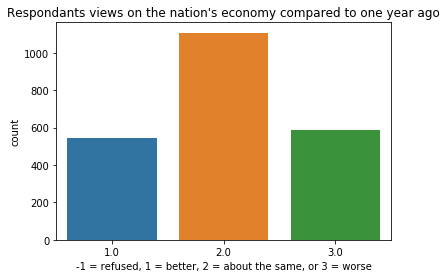

In [98]:
import seaborn  as   sns             # for plots
import matplotlib.pyplot as plt # as plt is sort of a nickname for the library because
                                # it is too long.
# UNIVARIATE GRAPH FOR CATEGORICAL VARIABLES

# Let's plot our categorical variables :
sns.countplot(x = "W1_G2", data = df)
plt.xlabel("-1 = refused, 1 = better, 2 = about the same, or 3 = worse")
plt.title("Respondants views on the nation's economy compared to one year ago")
# Show the plot
plt.show()

The respondents view on the US economy’s situation have a mode of 2 meaning that more of the 1108 of the 2243 respondents think that the economy’s situation is about the same.

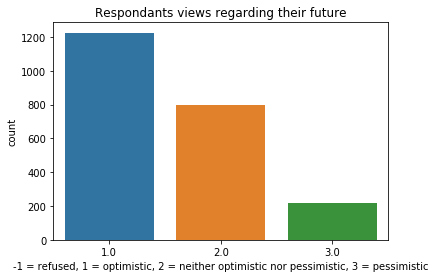

In [99]:
# For plotting the graph inside the notebook itself, we use the following command:

# UNIVARIATE GRAPH
# Graphique pour une variable : "Respondants views regardgin their future :

sns.countplot(x = "W1_F1", data = df)
plt.xlabel("-1 = refused, 1 = optimistic, 2 = neither optimistic nor pessimistic, 3 = pessimistic")
plt.title("Respondants views regarding their future")

# Show the plot
plt.show()

The majority of the respondents (about 1225) are optimistic about their future (mode = 1).


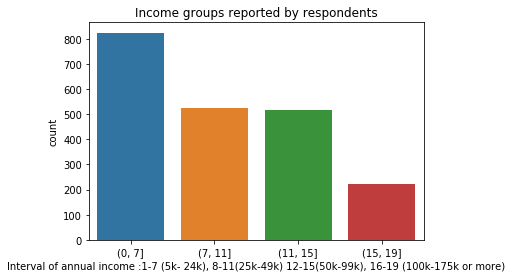

In [100]:
# UNIVARIATE GRAPH
# Graphique pour une variable : Income groups reported by respondents :

sns.countplot(x = "W1_P20", data = df)
plt.xlabel("Interval of annual income :1-7 (5k- 24k), 8-11(25k-49k) 12-15(50k-99k), 16-19 (100k-175k or more)")
plt.title("Income groups reported by respondents")

# Show plot
plt.show()

The average mode of the annual income is between 5 000 \$ and  24 000\$ ; this represents 825 respondents out of the 2092.

W1_D1 is the variable is How would you rate the president at the time (Barack Obama)
This will give a histogram


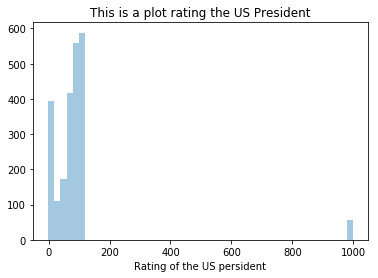

In [101]:
# Univariate quantitative variable
# For quantitative variable, the syntax we use in the Python program is slightly different.
# We'll use this quantitative variable :

print("W1_D1 is the variable is How would you rate the president at the time (Barack Obama)")

sns.distplot(df["W1_D1"].dropna(), kde=False);
plt.xlabel("Rating of the US persident")
plt.title("This is a plot rating the US President")
print("This will give a histogram")

# Show plot
plt.show()

W1_D17: How would you the respondant rate 'Black Nationalists'
This will give a histogram


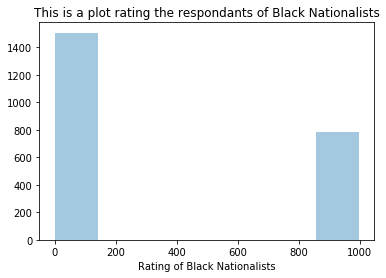

In [102]:
print("W1_D17: How would you the respondant rate 'Black Nationalists'")
sns.distplot(df["W1_D17"].dropna(), kde=False);
plt.xlabel("Rating of Black Nationalists")
plt.title("This is a plot rating the respondants of Black Nationalists")
print("This will give a histogram")

# Show plot
plt.show()

## Creating graphs showing the association between the explanatory and response variables

In reference to our research question, the **explanatory variable** is the income level (W1_P20) the perception of the and the **response variable** nation’s economic situation (measured by W1_G2 and/or W1_F1). Thus, using the graphing decisions flow chart we will use a Categorical to Categorical bar chart to plot the associations between our explanatory and response variables.

![data_analysis_and_interpretation_model-2.jpg](attachment:data_analysis_and_interpretation_model-2.jpg)

## Making decisions about the role that each variable will play

we're going to be visualizing our association of interest by exploring the relationship between two variables. 

The explanatory variable is the  income level (X = W1_P20) the perception of the and the response variable nation’s economic situation (Y = W1_G2 and/or W1_F1). Thus, using the graphing decisions flow chart we ** will be using a Categorical to Categorical bar chart ** to plot the associations between our explanatory and response variables.

**NOTE:** for a bivariate graph, where our response variable (Y) is categorical, we will actually need to convert this categorical response variable back to numeric. This is because the bivariate graph displays a mean on the y axis.

** We will be setting our response variable (Y) back to numeric to do a C -> C bar chart.

#### Note:: Pandas a été mis à jour, maintenant, il faut utiliser les condes suivants :
* df["W1_F1"] = pd.to_numeric(df["W1_F1"], errors="coerce")
* df["W1_P20"] = pd.to_numeric(df["W1_P20"], errors="coerce")
* df["W1_G2"] = pd.to_numeric(df["W1_G2"], errors="coerce")

This is the Categorical -> Categorical graph of US economy's situtation vs Personnal annual income


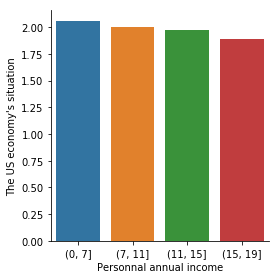

In [103]:
# BI VARIATE GRAPH :

# Personnal income (W1_P20) versus the US economy's situation (Y = W1_G2)
# Convert our Y response variable back to numeric
df["W1_G2"] = pd.to_numeric(df["W1_G2"], errors="coerce")

print("This is the Categorical -> Categorical graph of US economy's situtation vs Personnal annual income")
sns.factorplot(x = "W1_P20", y = "W1_G2", data = df, kind = "bar", ci = None) # ci=None suppresses error bars.
plt.xlabel("Personnal annual income")
plt.ylabel("The US economy's situation")

# Show plot
plt.show()

#### This is the Categorical to Categorical graph of the US economy's situtation vs Personnal annual income

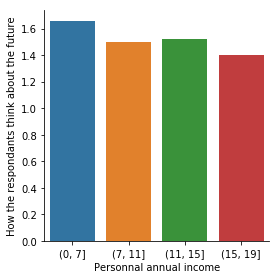

In [104]:
# BI VARIATE GRAPH :

# Convert our Y response variable back to numeric
df["W1_F1"] = pd.to_numeric(df["W1_F1"], errors="coerce")
# Personnal income versus how respondants think about the future

sns.factorplot(x = "W1_P20", y = "W1_F1", data = df, kind = "bar", ci = None)
plt.xlabel("Personnal annual income")
plt.ylabel("How the respondants think about the future")

# Show plot
plt.show()

W1_D17: [Black Nationalists] How would you rate:
W1_D1 is the variable is How would you rate the president at the time (Barack Obama)


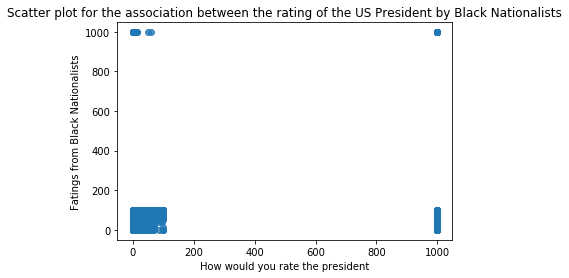

In [105]:
# Graphing quantitative variables
# We will use a scatter plot

print("W1_D17: [Black Nationalists] How would you rate:")
print("W1_D1 is the variable is How would you rate the president at the time (Barack Obama)")

scater_plot1 = sns.regplot(x = "W1_D17", y = "W1_D1", fit_reg = False, data = df)
plt.xlabel("How would you rate the president")
plt.ylabel("Fatings from Black Nationalists")
plt.title("Scatter plot for the association between the rating of the US President by Black Nationalists")
# We can add a fitting plot by removing the fit_reg = False
# Show plot
plt.show()

This is not a good locking graph, but it's just to get the idea of the codes used for a scatter plot.


# PART 2. DATA ANALYSIS

In this part of the analysis, we will develop and test hypotheses about our data. We will apply statistical tests, to apply for our specific data and question. We will explore ANOVA, Chi-Square, and Pearson correlation analysis.

# 2.1. Hypothesis Testing and Model Interpretation for ANOVA

Has a reminder, my research questions were has followed :

* **“To what extent is the perception of the us economic situation associated with the level of income?”**

Or,

* **“Does the perception of the us economic situation vary among income levels?”**

In our research question’s variables, we do not have a situation that will require an analysis of variance (ANOVA), i.e. a quantitative response variable and a categorical explanatory variable. Nevertheless, we will be using another variable from the dataset to determine if the association between the rating of the US president at the time (quantitative response variable) is related to the perception of the income level (categorical explanatory variable).

In [106]:
# Now that we have a research question, selected the data set and managed our variables
# of interest and visualized their relationship graphically, we are ready to
# test those relationships statistically.

# A partir d'ici, toutes les variables doivent etre numériques.


# ---------------------------- To calulate the ANOVA F-Statistics ----------------------------------

# If we have a bi-variate statistical analysis tools for two variables i.e. y = ax + b + et
# Analysis of variace Quantiative response variable (y) and Explanatory Categorical variable (x)
# Using ols function for the computing of the F-statistic and associated p value.

# As a reminder :

print("W1_D1 is the variable is How would you rate the president at the time (Barack Obama)")
print("W1_P20 is the Personnal Annual income")
print("The income level is divided into 4 groups : 1-7 (5k- 24k), 8-11(25k-49k)", end = '')
print(" 12-15(50k-99k), 16-19 (100k-175k or more))")

model1 = smf.ols(formula='W1_D1 ~ C(W1_P20)', data = df)
results1 = model1.fit()
print (results1.summary())

W1_D1 is the variable is How would you rate the president at the time (Barack Obama)
W1_P20 is the Personnal Annual income
The income level is divided into 4 groups : 1-7 (5k- 24k), 8-11(25k-49k) 12-15(50k-99k), 16-19 (100k-175k or more))
                            OLS Regression Results                            
Dep. Variable:                  W1_D1   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     9.429
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           3.45e-06
Time:                        12:12:15   Log-Likelihood:                -13235.
No. Observations:                2092   AIC:                         2.648e+04
Df Residuals:                    2088   BIC:                         2.650e+04
Df Model:                           3                                         
Covariance Type:            nonrobust             

When analyzing the relationship between the rating of the US president (quantitative response variable) and the income level (categorical explanatory variable), the analysis of variance reviled that among the 2,190 respondents (sample) with different income level reported significantly having different significantly rating for the US president at the time. The results of the ANOVA F-test [F(3, 2092) = 9.429 and a p-value < 0.0001] can be seen in the figure. We thus reject the null hypothesis and accept the alternative hypothesis of inequality of the mean of the ratings by the income level.



In [107]:
# To interpret this finding fully, we need to examine the actual means for the variables
# We will create a new data frame with the quatitative response variable and the categorical
# explanatory variable
sub3 = df[['W1_D1', 'W1_P20']].dropna()

# Means and standard deviations in the new dataframe :
print ("Means for income level by the president's rating")
m1= sub3.groupby('W1_P20').mean()
print (m1)

print ("standard deviations for income level by the president's rating")
sd1 = sub3.groupby('W1_P20').std()
print (sd1)

Means for income level by the president's rating
              W1_D1
W1_P20             
(0, 7]   104.986667
(7, 11]   75.652091
(11, 15]  68.218147
(15, 19]  83.493274
standard deviations for income level by the president's rating
              W1_D1
W1_P20             
(0, 7]   182.305911
(7, 11]   87.254912
(11, 15]  79.582158
(15, 19] 128.014212


In [108]:
# POST HOC TEST :

# In order to conduct post hoc paired comparisons in the context of my ANOVA, examining the association
# between ethnicity and number of cigarettes smoked per month, I'm going to use
# the Tukey HSDT, or Honestly Significant Difference Test.


# mc1 is the object that will store the mutiple comparisons test
# then, I include the quantitative response variable and the categorical explanatory variable
mc1 = multi.MultiComparison(sub3['W1_D1'], sub3['W1_P20'])
res1 = mc1.tukeyhsd()       # result (mc1) x the tukey post hoc test
print(res1.summary())

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2  meandiff  lower    upper   reject
---------------------------------------------------
 (0, 7]  (7, 11]  -29.3346 -48.7629 -9.9062   True 
 (0, 7]  (11, 15] -36.7685 -56.2883 -17.2488  True 
 (0, 7]  (15, 19] -21.4934 -47.7736  4.7868  False 
(7, 11]  (11, 15] -7.4339  -28.9876 14.1197  False 
(7, 11]  (15, 19]  7.8412  -19.9831 35.6654  False 
(11, 15] (15, 19] 15.2751  -12.613  43.1633  False 
---------------------------------------------------


## Model Interpretation for post hoc ANOVA results (Tukey HSDT):

Since we have multiple level for the categorical variable response variable (the rating of the US president), and we have rejected the null hypothesis of the equality of the means of the rating of the rating of the us president in regards to the income level (not all means are statistically equal); we know that not all means (of the rating) are equal. We will perform a post hoc test : the Tukey HSDT, or Honestly Significant Difference Test to determine witch mean are different.

The test show, the differences in rating of the US president (quantitative response variable) for each income level group pair (categorical explanatory variable). The post hoc comparisons of means of the rating of the US president by pairs of income level 5k-24k is significantly different for income level of 25k-49k and 50k-99k (fig. 2.). All other comparisons were statistically different.

# 2.2. Chi square test of independence

Is the perception of the us economic situation dependent or independent of the income levels? In reference to our research question, the **explanatory variable is the income level (W1_P20)** and the **perception of the and the response variable nation’s economic situation** (measured by W1_G2 and/or W1_F1).

## Chi-Square test :
- H0 : The null hypothesis is that there is no relationship between the point of view of the future and income level
- Ha : The alternative hypothesis is that there is a relationship.


The process we will use for the test of independence of the two categorical variables
1. Request the contingency table of observer counts;
2. Generate the column percentage that will show the percentage of 
3. Calculation of the Chi-square test of independence;


In [109]:
# 1) request the contengency table of observerved counts
print("Contengency table for the US economy's situation and Personnal Annual income")
print("The first results include the table of counts of the response variable by the explanatory variable.")
count1 = pd.crosstab(df["W1_G2"], df["W1_P20"])
print(count1)

Contengency table for the US economy's situation and Personnal Annual income
The first results include the table of counts of the response variable by the explanatory variable.
W1_P20    (0, 7]  (7, 11]  (11, 15]  (15, 19]
W1_G2                                        
1.000000     174      125       143        69
2.000000     413      273       240       110
3.000000     222      125       131        44


In [110]:
# This is just as a reminder
print("The income level is divided into 4 groups : 1-7 (5k- 24k), 8-11(25k-49k)", end = '')
print(" 12-15(50k-99k), 16-19 (100k-175k or more))")

# 2) Now we have to generate the column % wich will show the % of in
print("Column percentage")
colsum = count1.sum(axis=0)
colpercent = count1/colsum
print(colpercent)

The income level is divided into 4 groups : 1-7 (5k- 24k), 8-11(25k-49k) 12-15(50k-99k), 16-19 (100k-175k or more))
Column percentage
W1_P20     (0, 7]  (7, 11]  (11, 15]  (15, 19]
W1_G2                                         
1.000000 0.215080 0.239006  0.278210  0.309417
2.000000 0.510507 0.521989  0.466926  0.493274
3.000000 0.274413 0.239006  0.254864  0.197309


In [111]:
# Chi-square :
print("Chi-Square value, p-value, expected counts:")
chi_sq1 = scipy.stats.chi2_contingency(count1)
print(chi_sq1)

Chi-Square value, p-value, expected counts:
(15.462271753171541, 0.016950470653313929, 6, array([[ 199.80618656,  129.1701305 ,  126.94731754,   55.07636539],
       [ 405.08651522,  261.87916868,  257.37264379,  111.66167231],
       [ 204.10729821,  131.95070082,  129.68003867,   56.2619623 ]]))


## Model Interpretation for post hoc Chi-Square Test results:
When examining the association between Personal Annual income (categorical explanatory) and the perception about the US economy's situation (categorical response), a chi-square test of independence revealed that 30,9% of individuals that would you say that compared to one year ago, the nation’s economy is now better, are amongst the 100k-175k or more as an average salary. The majority of the interviewees states that the US economy is about the same [52,1 % and 46,6 % for 8-11(25k-49k) 12-15(50k-99k)].

The Chi-Square test X2 = 15.46, 1 degree of freedom and a p-value of 0.0169. We thus reject the null hypothesis and accept the alternative hypothesis: that there is a relationship between the two categorical variables (Income level  perception about the US economy’s situation). The relationship is negative and it can be seen if we plot the relationship between the explanatory and response variable.


We use the Chi-Square P(Χ2 > 15.462) = 0.016. 

**Interpreting the results**: 
Since the P-value (0.016) is less than the significance level (0.05), we cannot accept the null hypothesis. Thus, we conclude that there is a relationship between the point of vue of the futur and income level.

If we what to graph the percent of personnal annual income that have a positive view of the us economic outcoume. To plot this we need to :

**First setting out explanatory variable to categorical and a response variable to numeric.** 

In [112]:
# If I what to graph the percent of personnal annual income that have a positive
# view of the us economic outcoume

# To plot this we need to :
# First setting out explanatory variable to categorical and a response (Y) variable to numeric.  
df["W1_P20"] = df["W1_P20"].astype("category")
df["W1_G2"] = pd.to_numeric(df["W1_G2"], errors="coerce")

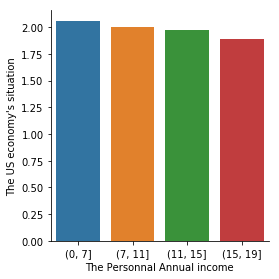

In [113]:
# Plot
# X the categorical variable and Y the numeric variable
sns.factorplot(x = "W1_P20", y = "W1_G2", data=df, kind = "bar", ci=None)
plt.xlabel("The Personnal Annual income")
plt.ylabel("The US economy's situation")
# Show plot
plt.show()

## Post Hoc Test for the Chi-Square

When the explanatory variable has more than two levels, the chi-square statistic and associated p-value, do not provide insight into why the null hypothesis can be rejected. It does not tell us what way the rates of the income level is not equal across the frequency categories. If we reject a null hypothesis, we need to perform comparisons for each pair of the income level (our explanatory variable) dependent's rates across the four income level frequency categories.

* We need to do chi-square for each paired comparison
* We need to recode to create new variables that allow us to choose only two frequency groups at a time.

The walktrouhgt : 
* Grouping values within individual variables 

It's easyer to understand if you graph the to variables. You need to recode for the comparaison of each "bar" of the graph expluding form the statement all other values in the explanatory variable (i.e. x = "W1_P20"). We rename this new added variable, and run the :
 - 1) request the contengency table of observerved counts of the newly managed variable (with only two label);
 - 2) generate the column percentage
 - 3) Compute the new Chi-square to compare (deux par deux) each income level versus the responce variable :

In [114]:
# One can do all the pair comparison on all; but an easier way to do this is by doing this :
import itertools
for pair in itertools.combinations([0, 7, 11, 15, 19], 2):       # Calculates all the combinasions
    count_subcategory =pd.crosstab(df["W1_P20"].isin(pair), df["W1_G2"])  # and provides the cross tabs
    print("chi sq test of subcategory: {}".format(pair))
    print(scipy.stats.chi2_contingency(count_subcategory))

chi sq test of subcategory: (0, 7)
(0.0, 1.0, 0, array([[  545.,  1108.,   590.]]))
chi sq test of subcategory: (0, 11)
(0.0, 1.0, 0, array([[  545.,  1108.,   590.]]))
chi sq test of subcategory: (0, 15)
(0.0, 1.0, 0, array([[  545.,  1108.,   590.]]))
chi sq test of subcategory: (0, 19)
(0.0, 1.0, 0, array([[  545.,  1108.,   590.]]))
chi sq test of subcategory: (7, 11)
(0.0, 1.0, 0, array([[  545.,  1108.,   590.]]))
chi sq test of subcategory: (7, 15)
(0.0, 1.0, 0, array([[  545.,  1108.,   590.]]))
chi sq test of subcategory: (7, 19)
(0.0, 1.0, 0, array([[  545.,  1108.,   590.]]))
chi sq test of subcategory: (11, 15)
(0.0, 1.0, 0, array([[  545.,  1108.,   590.]]))
chi sq test of subcategory: (11, 19)
(0.0, 1.0, 0, array([[  545.,  1108.,   590.]]))
chi sq test of subcategory: (15, 19)
(0.0, 1.0, 0, array([[  545.,  1108.,   590.]]))


The Post hoc comparisons of income level by pairs of perception of the US economy’s situation has not revealed significate information about the Post hoc comparisons.

# 2.3. Pearson Correlation

The Pearson correlation "r" measure a linear relationship between two quantitative variables. The stronger the relationship, the closer the Pearson correlation is near to |1| (absolute value). Now let's find the correlation coefficients from our dataset.
To do this, we will first create a new data frame that removes all the missing values, (the N/A values in the dataset) for each of the variables. The Pearson coefficient cannot be calculated in the presence of N/A's.
Our research question only includes categorical variables, we could choose other variables from your data set. But, since we have an ordinal variable, we will be using it to produce the correlation coefficient since the categories are ordered and the mean can be interpreted. The Income level, which is a more than three level categorical variable, can be used in the computation of the Pearson correlation.
** The scatter plot on the other hand will not be useful. In general the scatterplot is not useful for discrete variables (i.e. those that take on a limited number of values).**
When calculating the Pearson correlation, we obtain the following results for the Pearson coefficient of the “rating of people on welfare” by “income level”, the “rating of the wealthiest 1%” by “income level”.

![image.png](attachment:image.png)

In [115]:
# Now let's find the correlation coefficients. 
# To do this, first, I create a new data frame that drops all missing, that is, N/A values for 
# each of the variables from the data set.

# The pearson coefficient can not be calculated in the presence of N/A's in the dataset :
df_clean = df.dropna()

In [116]:
# ---------------------------- Pearson Correlation -----------------------------------------------
# ---------------------------- Relationship between two quantitative variables -------------------

# Now let's find the correlation coefficients. 
# To do this, first, I create a new data frame that drops all missing, that is, N/A values for 
# each of the variables from the data set.

# The pearson coefficient can not be calculated in the presence of N/A's in the dataset :
df_clean = df.dropna()

# The scatter plot on the other hand will not be useful. In general the scatterplot is not useful
# for discrete variables (i.e. those that take on a limited number of values)

print("W1_N1J: How would you rate the wealthiest 1%?")
print("W1_N1A: How would you rate people on welfare?")
print("W1_P20 : Income level")

df_clean["W1_P20"] = pd.to_numeric(df_clean["W1_P20"], errors="coerce")

print("The association between the income level and the rating of people on welfate")
print("The correlation coefficient and the associate P-value.")
print(scipy.stats.pearsonr(df_clean["W1_P20"], df_clean["W1_N1A"]))


print("The association between the income level and the rating of the wealthiest 1%?")
print("The correlation coefficient and the assoicated P-value :")
print(scipy.stats.pearsonr(df_clean["W1_P20"], df_clean["W1_N1J"]))

W1_N1J: How would you rate the wealthiest 1%?
W1_N1A: How would you rate people on welfare?
W1_P20 : Income level
The association between the income level and the rating of people on welfate
The correlation coefficient and the associate P-value.
(nan, 1.0)
The association between the income level and the rating of the wealthiest 1%?
The correlation coefficient and the assoicated P-value :
(nan, 1.0)


In [117]:
# ---------------------------- Pearson Correlation -----------------------------------------------
# ---------------------------- Relationship between two quantitative variables -------------------

# Now let's find the correlation coefficients.
# To do this, first, I create a new data frame that drops all missing, that is, N/A values for
# each of the variables from the data set.

# The pearson coefficient can not be calculated in the presence of N/A's in the dataset :
df_clean = df.dropna()

In [118]:
# The scatter plot on the other hand will not be useful. In general the scatterplot is not useful
# for discrete variables (i.e. those that take on a limited number of values)
pd.options.mode.chained_assignment = None  # default='warn'

print("W1_N1J: How would you rate the wealthiest 1%?")
print("W1_N1A: How would you rate people on welfare?")
print("W1_P20 : Income level")

df_clean["W1_P20"] = pd.to_numeric(df_clean["W1_P20"], errors="coerce")

W1_N1J: How would you rate the wealthiest 1%?
W1_N1A: How would you rate people on welfare?
W1_P20 : Income level


In [119]:
print("The association between the income level and the rating of people on welfate")
print("The correlation coefficient and the associate P-value.")
print(scipy.stats.pearsonr(df_clean["W1_P20"], df_clean["W1_N1A"]))


print("The association between the income level and the rating of the wealthiest 1%?")
print("The correlation coefficient and the assoicated P-value :")
print(scipy.stats.pearsonr(df_clean["W1_P20"], df_clean["W1_N1J"]))

The association between the income level and the rating of people on welfate
The correlation coefficient and the associate P-value.
(nan, 1.0)
The association between the income level and the rating of the wealthiest 1%?
The correlation coefficient and the assoicated P-value :
(nan, 1.0)


The Pearson correlation "r" for the two computations are small: -0.13, -0.15; but all the associated P-value are less than 0,05 our significance level. Because these are explanatory variable and the context of correlation coefficient is quantitative, there is no need to conduct post hoc tests. 
If we square the "r" coefficient, we can see witch percentage of the association between the two variables can be explained or predicted by a fraction of the other. The r2 for the two relationships are -0.01 and -0.02; which tells us that only 1% of the variability of their perception of the wealthiest 1% can be explained by the income level; likewise, only -2% of the perception of people on welfare can be explained by the income level. We can safely state that other variables are to be taken into account when determining these relationships; or that the relationships between these perceptions are (while statistically significant) are speculative.

In [120]:
0.45287655167034591**2

0.2050971710528235

# 2.4. Exploring Statistical Interactions

We will be considering the statistical iteration in this part of our analysis.


## a) The hypothesis (augmented)

We have previously anticipated that there is a positive relationship between the **perception of the us economic situation** and **household income**; in the sense that the more an individual has a high level of income, the more likely they will have a positive outcome on the economic situation of the us economy.

At the lower level of income, it can be anticipated that there will be a greater proportion of individual who will consider that the us economy is doing worse. We will also test if a third variable is moderating the relationship between the two variables: W1_A1 "How interested are you in what's going on in government and politics?". The interest in Politics can be a moderating variable in the sense that the perception of the us economic situation related to income level may vary depending upon the level of interest in politics or government.

![data_analysis_and_interpretation_model-4.jpg](attachment:data_analysis_and_interpretation_model-4.jpg)


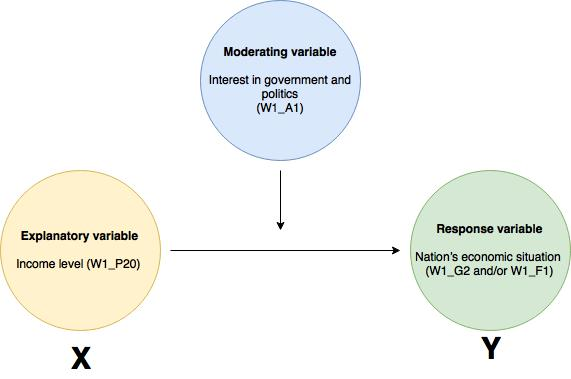

In [121]:
from IPython.display import Image
Image (filename = "data_analysis_and_interpretation_model-4.jpg")

** Fig. General model for our analysis **

In [122]:
# ---------------------------- Exploring Statistical Interactions

# ---------------------------- Chi square test of independance with moderation ------------------------------------
# Two categorical variable and a moderating variable

# First we need to test the existance of the relationship :

# Is the perception of the us economic situation dependent or indedendent of
# the income levels?

# In reference to our research question, the explanatory variable is the income
# level (W1_P20) the perception of the and the response variable nation’s
# economic situation (measured by W1_G2 and/or W1_F1).

# Explanatory variable, idependant (x) variable
# W1_P20: is the Personnal Annual income

# The response variables (Y):
# W1_G2: is the US economy's situation
# W1_F1: is the Percentage of how the respondants think about the future

# 1) request the contengency table of observerved counts

print("Contengency table for the US economy's situation and Personnal Annual income")
print("The first results include the table of counts of the response variable by the explanatory variable :")
count1 = pd.crosstab(df["W1_G2"], df["W1_P20"])
print(count1)
print("")

# 2) Now we have to generate the column % wich will show the % of in
print("Column percentage :")
colsum = count1.sum(axis=0)
col_percent = count1/colsum
print(col_percent)
print("")

# 3) Chi-square :
print("Chi-Square value, p-value, expected counts:")
chi_sq = scipy.stats.chi2_contingency(count1)
print(chi_sq)

Contengency table for the US economy's situation and Personnal Annual income
The first results include the table of counts of the response variable by the explanatory variable :
W1_P20    (0, 7]  (7, 11]  (11, 15]  (15, 19]
W1_G2                                        
1.000000     174      125       143        69
2.000000     413      273       240       110
3.000000     222      125       131        44

Column percentage :
W1_P20     (0, 7]  (7, 11]  (11, 15]  (15, 19]
W1_G2                                         
1.000000 0.215080 0.239006  0.278210  0.309417
2.000000 0.510507 0.521989  0.466926  0.493274
3.000000 0.274413 0.239006  0.254864  0.197309

Chi-Square value, p-value, expected counts:
(15.462271753171541, 0.016950470653313929, 6, array([[ 199.80618656,  129.1701305 ,  126.94731754,   55.07636539],
       [ 405.08651522,  261.87916868,  257.37264379,  111.66167231],
       [ 204.10729821,  131.95070082,  129.68003867,   56.2619623 ]]))


Is the perception of the us economic situation dependent or independent of the income levels? We will test the first part of our hypothesis with a Chi-Square test of independence; 
When examining the relationship between the perception of the us economic situation and the income levels, we found a P-value of 0.0169. The relationship is statistically significant. Second step is to test the relationship with each level of interest in politics (W1_A1 "How interested are you in what's going on in government and politics?").

## b) Influence of the moderating variable

The second step is to test the relationship with each level of interest in politics (W1_A1 “How interested are you in what’s going on in government and politics?”). We are going to evaluate the level of interest in politics has the third variable. Our question will be:

- Does the level of interest in politics affect either the strength or the direction of the relationship between the perception of the us economic situation and household income?
- Or, does level of interest in politics moderate the significant statistical relationship between the perception of the us economic situation and household income?
- Finally, is the perception of the us economic situation related to household income for each level of interest in politics? 


We have created a new variable collapsing the level of interest in politics variable with 5 levels into a two-level variable.

In [123]:
# First, we need to do a little bit of data management 

# Convert to numeric
df["W1_A1"] = pd.to_numeric(df["W1_A1"], errors = "coerce")

# Replace the about missing values
df["W1_A1"]=df["W1_A1"].replace(-1, np.nan)

# The variables and name the count column
print("1 Extremely interested, 2 Very interested, 3 Moderately interested, 4 Slightly interested")
print("5 Not interested at all, -1 Refused")
b1 = pd.crosstab(index = df["W1_A1"], columns = "counts")
print(b1)


# Let's create a new variable to characterize the level of interest in politics 
# - interest in politics variable with 5 levels into a two-level variable
def var1 (row):
    if row["W1_A1"] == 1:
        return 1
    elif row ["W1_A1"] == 2:
        return 1
    elif row["W1_A1"] == 3:
        return 1
    elif row["W1_A1"] == 4:
        return 0
    elif row ["W1_A1"] == 5:
        return 0

# Second, let's add this variable in the dataframe
df["var1"] = df.apply(lambda row : var1(row), axis = 1)

print("This is the counts for the new variable : 1 = interested in politics, 0 = Not interested")
c9 = pd.crosstab(index = df["var1"], columns = "counts")
print(c9)

1 Extremely interested, 2 Very interested, 3 Moderately interested, 4 Slightly interested
5 Not interested at all, -1 Refused
col_0     counts
W1_A1           
1.000000     389
2.000000     679
3.000000     658
4.000000     354
5.000000     198
This is the counts for the new variable : 1 = interested in politics, 0 = Not interested
col_0     counts
var1            
0.000000     552
1.000000    1726


#### Chi-Square for the relationship between INCOME LEVEL and perception of the US ECONOMY'S SITUATION for those who are INTERESTED IN POLITICS :

After defining two new data frames with only those who are interested in politics and those who are the respondents who are not interested in politics, we found the following Chi-Square testing the independence :

In [124]:
# Third, for the chi-square interactions : we need to define new data frames with only the levels of
#   the moderating variables = setting new data frames that includes individuals with ore without

# the levels of interest in politics :
sub11 = df[(df["var1"] == 1)].dropna()  # Intereted in politics
sub22 = df[(df["var1"] == 0)].dropna()  # Not interested in politics

# Chi-Square for the relationship between INCOME LEVEL and perception of the US economy's situation
# for those who are INTERESTED in politics

# 1 contingency table of observed counts for those who are INTERESTED in politics
print("US economy's situation vs Personnal Annual income, for those who are INTERESTED in politics")
count11 = pd.crosstab(sub11["W1_G2"], sub11["W1_P20"])
print(count11)
print("")

# 2) Now we have to generate the column % wich will show the % of in
print("Column percentage :")
colsum11 = count11.sum(axis=0)
col_percent11 = count11/colsum
print(col_percent11)
print("")

# 3) Chi-square (for the US economy's situation and Personnal Annual income) for those who are EXTREMELY interested in politics:
print("Chi-square for the US economy's situation vs Personnal Annual income, for those who are INTERESTED in politics")
print("Chi-Square value, p-value, expected counts (INTERESTED in politique):")
chi_sq11 = scipy.stats.chi2_contingency(count11)
print(chi_sq11)
print("")
print("The relationship IS statisticaly significative")

US economy's situation vs Personnal Annual income, for those who are INTERESTED in politics
W1_P20    (0, 7]  (7, 11]  (11, 15]  (15, 19]
W1_G2                                        
1.000000     141       99       128        64
2.000000     273      201       174        90
3.000000     147       99       106        38

Column percentage :
W1_P20     (0, 7]  (7, 11]  (11, 15]  (15, 19]
W1_G2                                         
1.000000 0.174289 0.189293  0.249027  0.286996
2.000000 0.337454 0.384321  0.338521  0.403587
3.000000 0.181706 0.189293  0.206226  0.170404

Chi-square for the US economy's situation vs Personnal Annual income, for those who are INTERESTED in politics
Chi-Square value, p-value, expected counts (INTERESTED in politique):
(12.186815712527409, 0.057928605559865176, 6, array([[ 155.35384615,  110.49230769,  112.98461538,   53.16923077],
       [ 265.39615385,  188.75769231,  193.01538462,   90.83076923],
       [ 140.25      ,   99.75      ,  102.        ,   4

In [125]:
##              NOT INTERESTED in politics
print("US economy's situation vs Personnal Annual income, for those who are NOT INTERESTED in politics")
count12 = pd.crosstab(sub22["W1_G2"], sub22["W1_P20"])
print(count12)
print("")

# 2) Now we have to generate the column % wich will show the % of in
print("Column percentage :")
colsum12 = count12.sum(axis=0)
col_percent12 = count12/colsum
print(col_percent12)
print("")

# 3) Chi-square (for the US economy's situation and Personnal Annual income) for those who are NOT INTERESTED in politics :
print("Chi-square for the US economy's situation and Personnal Annual income, for those who are NOT INTERESTED in politics")
print("Chi-Square value, p-value, expected counts (NOT INTERESTED in politics):")
chi_sq12 = scipy.stats.chi2_contingency(count12)
print(chi_sq12)
print("")

print("The relationship IS NOT significative")

US economy's situation vs Personnal Annual income, for those who are NOT INTERESTED in politics
W1_P20    (0, 7]  (7, 11]  (11, 15]  (15, 19]
W1_G2                                        
1.000000      33       24        14         5
2.000000     131       67        63        20
3.000000      69       25        25         5

Column percentage :
W1_P20     (0, 7]  (7, 11]  (11, 15]  (15, 19]
W1_G2                                         
1.000000 0.040791 0.045889  0.027237  0.022422
2.000000 0.161928 0.128107  0.122568  0.089686
3.000000 0.085290 0.047801  0.048638  0.022422

Chi-square for the US economy's situation and Personnal Annual income, for those who are NOT INTERESTED in politics
Chi-Square value, p-value, expected counts (NOT INTERESTED in politics):
(6.3513885384300428, 0.38499949706811565, 6, array([[  36.81496881,   18.32848233,   16.11642412,    4.74012474],
       [ 136.11850312,   67.76715177,   59.58835759,   17.52598753],
       [  60.06652807,   29.9043659 ,   26.29

### Conclusion : we can assume two things from our results:

1)  that there is a significant statistical relationship between the variables (Perception of the US economy's situation and income level).

2) the relationship between the US economic situation and income level is significantly moderated by the level of interest of the respondents in politics.

Is the perception of the us economic situation dependent or independent of the income levels? Since we are testing the relationship between two categorical variables,  we will test the first part of our hypothesis with a Chi-Square test of independence.

When examining the relationship between the perception of the us economic situation and the income levels, we found a P-value of 0.01. The relationship is statistically significant.

*Because this is a two level analysis, in regards to the moderating variable, we do not need to conduct a post-hoc test.*

# PART 3. REGRESSION MODELING IN PRACTICE

# 3.1. Writing About the Data


In this section of our analysis, we will describe the sample used 
(1), the data collection procedures 
(2), and finally, we will describe the variables of interest, 
(3), the model used and the management decisions made to provide further insight in to our research question.

## 1. The sample. 

The 2012 Outlook Surveys, that I am using in my analysis has been conducted by GfK Knowledge Networks on behalf of the University of California Irvine. The study is designed to provide insight into political and social attitudes in the United States. The project included two surveys fielded between August and December 2012 using a sample from an Internet panel.

The survey also contained a large oversample of Black ethnics. The target population was comprised of four groups: African American/Black males aged 18 and older, African American/Black females aged 18 and older, White/other race males aged 18 and older, and White/other race females aged 18 older, all non-institutionalized and residing in the United States

The number of observations in the dataset is 2,294. Thus, a total of 2,294 respondents participated in this study; 1,601 were re-interviewed. 

## 2. The procedures that were used to collect the data.

The method used to collect the data is a web-based survey. The project included two surveys fielded between August and December 2012 using a sample from an Internet panel. The survey considered the ways in which social class, ethnicity, marital status, feminism, religiosity, political orientation, sexual behavior, and cultural beliefs or stereotypes influence opinion and behavior.

## 3. The variables used in our data analysis and our model

In this part of the presentation of our data, we provide description of our explanatory and response variables measured, the response scales and the data management decisions that we have done so far.

**Our research question is: “To what extent is the perception of the US economic situation associated with the level of income?”**

To answer the question, we will use these variables from the data set:

**a) Explanatory variable (X):**
- W1_P20: is the Personal Annual income (which is a categorical ordinal variable with 20 levels of response);

**b) Response variable (Y):**
- W1_G2: is the US economy’s situation (which is a categorical variable with the values coded for “Better”, “About the same”, “Worse”);
- W1_F1: is the Perception of how the respondents think about the future (this is also a categorical variable with a tree point scale: “Optimistic”, “Neither”, “Pessimistic”);

**c) Moderating variable :**
- W1_A1: measures the level of interest in politics. This variable is also a categorical variable with a five-point Scales (“Extremely interested”, “Very interested”, “Moderately interested”, “Slightly interested”, “Not interested at all”).


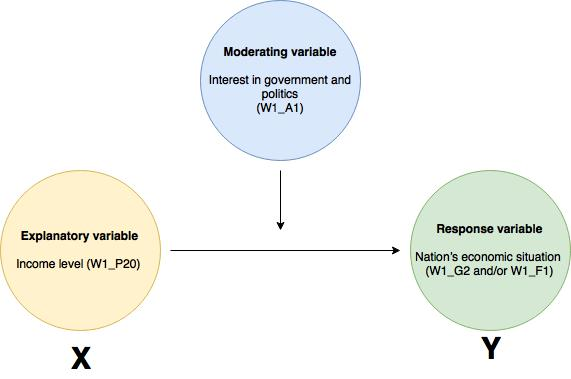

In [126]:
from IPython.display import Image
Image (filename = "data_analysis_and_interpretation_model-4.jpg")

We have made 3 data management decisions in our variables of interest:

- Re-code the missing variables to NaN ;
- Regroup the income variable which had 20 categories to 4 categories based on customized splits;
- Regrouped variable measuring the level of interest in politic form a five-point Scales to a two-point scale (1 = interested in politics, 0 = Not interested).

After providing data management to our variables (coding the missing values and regrouping the income level into four categories), we are using the full length of the data set and not a sample of the data.


_Source : Inter-university Consortium for Political and Social Research : 
http://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/35348?q=outlook+on+life_

_Note :_
_It’s important to know how the data set you’re working with was generated, and how to describe your data management steps to others._


# 3.2. Testing a Basic Linear Regression Model 

### Preparation and data management prior to the linear regression:

Since our explanatory variable is categorical with more than two categories, we will collapse it to two levels. We begin by creating a new variable that will reflect the socioeconomic status. This new variable of the **“social economic status”** has two levels (0,1). This new variable is coded has “0” for revenues that are less than \[\$50,000 to \$59,999] (labeled 12 in the original variable intervalls); and “1″ otherwise:

*Note: We had to re-import the dataset because of the data management done on the "Revenu" variable ("W1_P20") that we have cut it in previous analysis - I don't know (yet) how to bring it back to it's original state ...*

In [127]:
# Importing the data set:

df = pd.read_csv("ool_pds.csv", low_memory=False)

# New codes
df["W1_G2"] = pd.to_numeric(df["W1_G2"], errors="coerce")
df["W1_P20"] = pd.to_numeric(df["W1_P20"], errors="coerce")
df["W1_F1"] = pd.to_numeric(df["W1_F1"], errors="coerce")

# Let's start the Data Management ~ decision about the data, missing values and creating secondary variables")
df["W1_P20"] = df["W1_P20"].replace(-1, np.nan)
df["W1_G2"] = df["W1_G2"].replace(-1, np.nan)
df["W1_F1"] = df["W1_F1"].replace(-1, np.nan)
df["W1_D1"] = df["W1_D1"].replace(-1, np.nan)
df["W1_D1"] = df["W1_D1"].replace(998, np.nan)
df["W1_A12"] = df["W1_A12"].replace(-1, np.nan)

In [128]:
# ---------------------------- Basic linear regression ----------------------------

# Data preparation and data management :

# 1) Since our explanatory variable is categorical with more than two categories, 
# you will need to collapse it down to two categories, 

# Let's create a new variable to characterize the social economic status 
# For revenues less than $50,000 to $59,999 (labeled 12), they will be coded has 0; 
# and 1 otherwise

def SocioEcoStatus(row):
    if row["W1_P20"] < 12:
        return 0
    if row["W1_P20"] > 12:
        return 1

# Now, this new variable needs to be added to the dataframe
df["SocioEcoStatus"] = df.apply(lambda row: SocioEcoStatus(row), axis=1)

We have the results in the table 1 : the frequency table for our (recoded) categorical explanatory variable.

In [129]:
# This is just to check the accuracy of the codes
print("This is the counts for the new variable : 1 = high revenus, 0 = low revenues")
count20 = pd.crosstab(index=df["SocioEcoStatus"], columns="counts")
print(count20)

This is the counts for the new variable : 1 = high revenus, 0 = low revenues
col_0           counts
SocioEcoStatus        
0.000000          1351
1.000000           575


## The results of our linear regression analysis

In our original research question’s variables, we do not have a situation with a quantitative response variable. Nevertheless, we will be using another variable from the dataset. We will be determining if the association between the rating of the US president at the time (quantitative response variable = W1_D1) is related to the socioeconomic status (two level categorical explanatory variable). Our research question is : “Is the rating of the US president is associated with the socioeconomic status?”.

We find the results of the linear regression in the table 2.

In [130]:
print("Table 2. This is the basic linear regression")
print("")
# now, let us test a linear regression model
regression1 = smf.ols("W1_D1 ~ SocioEcoStatus", data = df).fit()
print(regression1.summary())

Table 2. This is the basic linear regression

                            OLS Regression Results                            
Dep. Variable:                  W1_D1   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     7.080
Date:                Wed, 07 Mar 2018   Prob (F-statistic):            0.00786
Time:                        12:12:17   Log-Likelihood:                -9107.0
No. Observations:                1860   AIC:                         1.822e+04
Df Residuals:                    1858   BIC:                         1.823e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

The socioeconomic status is = **-4.3453** and it is statistically significant with a P-Value less than 0.05; The Intercept is also statistically significant 69.8.

Thus, our equation is: **W1_D1=93.5-4.34 X SocioEcoStatus**

# 3.3. Testing a Multiple Regression Model 

## 1) Result of the multiple regression analysis

We are testing the hypothesis that the president’s rating is related to the socioeconomic status and the interest in politics.

We have found previously that the variable interest in politics and socioeconomic status where statistically significant in determining the rating of the president; by adding the perception about the future and the economy’s situation, the approval of how the president is handling is job and the gender variable, all the parameter remains statistically significant (except the “interest in politics” and the “socio economic status” variable. But, the R2 at the end is strong (0.710). Thus, after adjusting and running the regressions, we found potential confounding factors are: the interest in politics and the socioeconomic status. 


In [131]:
# ---------------------------- Testing a Multiple Regression Model ----------------------------
# ---------------- Preparation and data management prior to the linear regression -------------

# We will start by doing a few data management and change the variables that 
# we'll be working with to two categories

# Let's create a new variable caracterising the level of interest in politics
# Let's create a new variable to characterize the interest in politics 

# As a reminder
print("As a reminder :")
print("W1_P20 is the 2 level Personnal Annual income has been transformed to a variable called SocioEcoStatus")
print("W1_G2 is the US economy's situation has been transformed to economy_situation")
print("W1_F1 is the perception of how the respondants think about the future is now : future_perception")
print('W1_D1 is the rating of the former US president')
print("W1_A12: Do you approve or disapprove of the way Barack Obama is handling his job as President?: is now approval")
print("")


# --------- We will have to do a little bit of recoding (0,1) instead of (1,2) --- 
# We define the new variables and add them to the dataframe :

def PolInt(row):
    if row["W1_A1"] == 1:
        return 1
    elif row["W1_A1"] == 2:
        return 1
    elif row["W1_A1"] == 3:
        return 1
    elif row["W1_A1"] == 4:
        return 0
    elif row["W1_A1"] == 5:
        return 0

# Now, let's add this variable in the dataframe
df["PolInt"] = df.apply(lambda row: PolInt(row), axis=1)

# Let's add an other variable to try to eleviate the R2

# W2_QB1C:  Did you vote for a candidate for President?

# We will be adding this variable Gender to the equation

def gender(row):
    if row["PPGENDER"] == 2:
        return 0
    if row["PPGENDER"] == 1:
        return 1

# This variable is then added to the dataframe
df["gender"] = df.apply(lambda row: gender(row), axis=1)


def economy_situation(row):
    if row["W1_G2"] == 1:
        return 1
    if row["W1_G2"] == 2:
        return 0
    if row["W1_G2"] == 3:
        return 0

# This variable is then added to the dataframe
df["economy_situation"] = df.apply(lambda row: economy_situation(row), axis=1)


def future_perception(row):
    if row["W1_F1"] == 1:
        return 1
    if row["W1_F1"] == 2:
        return 0
    if row["W1_F1"] == 3:
        return 0

# This variable is then added to the dataframe
df["future_perception"] = df.apply(lambda row: future_perception(row), axis=1)

def approval(row):
    if row["W1_A12"] == 1:
        return 1
    if row["W1_A12"] == 2:
        return 0


# This variable is then added to the dataframe
df["approval"] = df.apply(lambda row: approval(row), axis=1)

As a reminder :
W1_P20 is the 2 level Personnal Annual income has been transformed to a variable called SocioEcoStatus
W1_G2 is the US economy's situation has been transformed to economy_situation
W1_F1 is the perception of how the respondants think about the future is now : future_perception
W1_D1 is the rating of the former US president
W1_A12: Do you approve or disapprove of the way Barack Obama is handling his job as President?: is now approval



In [132]:
# This is to verify the acquracy of the codes before moving on :

print("This is the counts for the new variable : 1 = high revenus, 0 = low revenues")
count20 = pd.crosstab(index=df["SocioEcoStatus"], columns="counts")
print(count20)

print("This is the counts for the variable PolInt : 1 = interested in politics, 0 = Not interested in politics")
c1_a = pd.crosstab(index=df["PolInt"], columns="counts")
print(c1_a)

print("This the gender variable’s count 1 = male, 0 = female")
c1_b = pd.crosstab(index=df["gender"], columns="counts")
print(c1_b)

print("This is the counts for the economy_situation : 1 = Better, 0 = Worse")
c1_c = pd.crosstab(index=df["economy_situation"], columns="counts")
print(c1_c)

print("This is the counts for future_perception : 1 = Optimistic, 0 = Pessimistic")
c1_d = pd.crosstab(index=df["future_perception"], columns="counts")
print(c1_d)

print("This is the counts for approval variable : 1 = Approve, 0 = Disapprove")
c1_e = pd.crosstab(index=df["approval"], columns="counts")
print(c1_e)

print(
    "This is the counts of the socio-economic status : 1 = revenus less than $50,000 to $59,999 and 1 = revenus from $60,000 to $175,000 or more")
c1_f = pd.crosstab(index=df["SocioEcoStatus"], columns="counts")
print(c1_f)

This is the counts for the new variable : 1 = high revenus, 0 = low revenues
col_0           counts
SocioEcoStatus        
0.000000          1351
1.000000           575
This is the counts for the variable PolInt : 1 = interested in politics, 0 = Not interested in politics
col_0     counts
PolInt          
0.000000     552
1.000000    1726
This the gender variable’s count 1 = male, 0 = female
col_0   counts
gender        
0         1262
1         1032
This is the counts for the economy_situation : 1 = Better, 0 = Worse
col_0              counts
economy_situation        
0.000000             1698
1.000000              545
This is the counts for future_perception : 1 = Optimistic, 0 = Pessimistic
col_0              counts
future_perception        
0.000000             1014
1.000000             1225
This is the counts for approval variable : 1 = Approve, 0 = Disapprove
col_0     counts
approval        
0.000000     666
1.000000    1570
This is the counts of the socio-economic status : 1 = 

### Testing and evaluating different regressions

In [133]:
regression2 = smf.ols("W1_D1 ~ SocioEcoStatus + PolInt", data=df).fit()
print(regression2.summary())

                            OLS Regression Results                            
Dep. Variable:                  W1_D1   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.569
Date:                Wed, 07 Mar 2018   Prob (F-statistic):            0.00388
Time:                        12:12:18   Log-Likelihood:                -9046.1
No. Observations:                1848   AIC:                         1.810e+04
Df Residuals:                    1845   BIC:                         1.811e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.1150      1.610     41.

In [134]:
regression6 = smf.ols("W1_D1 ~ SocioEcoStatus + economy_situation + future_perception + gender", data=df).fit()
print(regression6.summary())

                            OLS Regression Results                            
Dep. Variable:                  W1_D1   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     55.94
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           1.49e-44
Time:                        12:12:18   Log-Likelihood:                -8851.0
No. Observations:                1827   AIC:                         1.771e+04
Df Residuals:                    1822   BIC:                         1.774e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            62.4666      1.32

## 2) Output from the multiple regression model

We keep the regression result in table 1 has our final regression (table 1).

Thus the rating of the former US president (W1_D1) is related to the perception about the economy’s situation (economy situation: beta1 = 4.1438, p = 0.000), perception about the future (future_perception : beta2 = 2.99, p = 0.000), gender (beta3 = -1.79, p = 0.02), and the approval of the way the president is handling his job (approval : beta4 = 59.82, p = 0.000).


In [135]:
print("Table 1 . Results of the regression model")
print("")
# This is the model we will keep :
regression7 = smf.ols("W1_D1 ~ economy_situation + future_perception + gender + approval", data=df).fit()
print(regression7.summary())


Table 1 . Results of the regression model

                            OLS Regression Results                            
Dep. Variable:                  W1_D1   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1283.
Date:                Wed, 07 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:12:18   Log-Likelihood:                -9079.4
No. Observations:                2105   AIC:                         1.817e+04
Df Residuals:                    2100   BIC:                         1.820e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Note:: the model can be summarized has :

*President’s rating = perception about the economy’s situation + perception about the future + gender + approval of how the president is doing his job + gender + error term*

## 3) Regression diagnostic plots.

What we’re looking for is to see if the points follow a straight line. Meaning that the model estimated residuals are what we would expect if the residuals were normally distributed (fig. 1).

As a reminder, the assumptuions of a linear regression are :
1. Normality of the residuals
2. Linearity
3. Homoscedasticity
4. Independance
5. Multicolinarity
6. Outliers

The qqplot for our regression model shows that the residuals do not follow a straight line, and deviate at the lower and upper quantiles. Compared to the theoretical quantiles, the deviations at the lower quantiles is more pronounced. This indicates that our residuals did not follow a normal distribution.

Fig 1. qqplot of the residual of our model
This a qq-plot to evaluate the normality of the residual


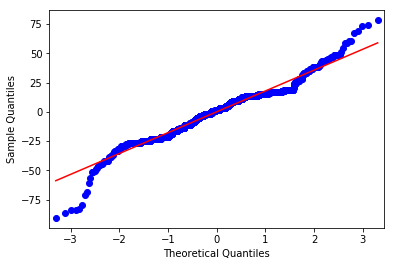

In [136]:
# ---------------------------- Test of the validity of the Model ----------------------------

print("Fig 1. qqplot of the residual of our model")
# 1 . NORMALITY OF THE RESIDUALS 

# qq-plot to evaluate the normality of the residual 
print("This a qq-plot to evaluate the normality of the residual")
figure1 = sm.qqplot(regression7.resid, line="r")
#print(figure1) this in spyder IDE
plt.show()

To evaluate the overall fit of the predicted values of the response variable to the observed values and to look for outliers, we will examine the plot of the standardized residuals for each of the observations (fig 2). A residual plot shows the standardized residuals on the Y axis and the number of observation in the X horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate. The results of the standardized residuals are found in the fig. 2.

Fig 2. The standardized residuals for our model


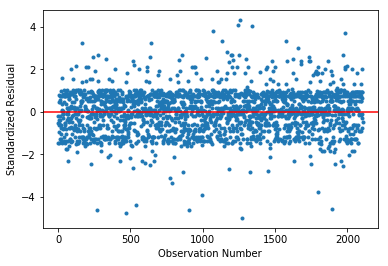

In [137]:
print("Fig 2. The standardized residuals for our model")

# This is the plot of residuals
stdres = pd.DataFrame(regression7.resid_pearson)
plt.plot(stdres, '.', ls='None')     # You can also change the "o" to ".", I prefer "."
l = plt.axhline(y=0, color='r')      # axhline : axis horizontal line --> color = red.
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.show()

In general, we found that more than 68.26 % of the residuals fall within one standard deviation of the mean. With the standard normal distribution, we would anticipate that 95% of the values of the residuals to fall between two standard deviations of the mean. We have some extreme outliers.

Fig 3. Additional regression diagnostic plots for the variable “Approval”



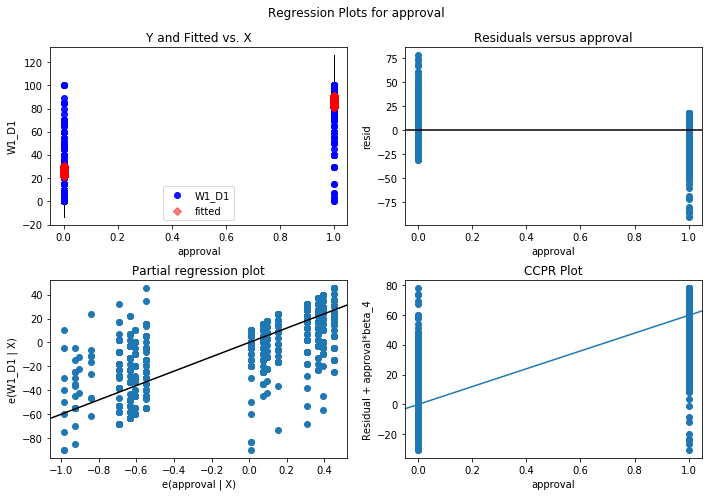

In [138]:
# 2. REGRESSION PLOTS

# The following Python code can be used to generate a few more plots to help us
# determine how specific explanatory variables contribute to the fit of our model. 
# additional regression diagnostic plots

print("Fig 3. Additional regression diagnostic plots for the variable “Approval”")
print("")

figure2 = plt.figure(figsize=(10, 7))
figure2 = sm.graphics.plot_regress_exog(regression7, "approval", fig=figure2)
# print(figure2)
plt.show()

Finally, because we have multiple explanatory variables in our model, we can have a feel of the contribution of each individual explanatory variable to the model specification, controlling for the other explanatory variables. We will look at the Partial regression plot for the variable “approval” (fig. 3 c.).

Fig. 4 Leverage plot



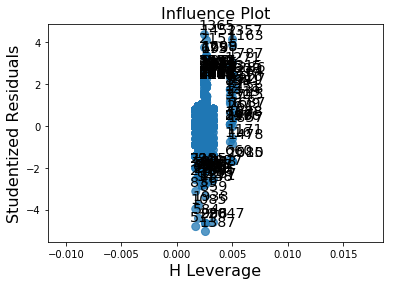

In [139]:
# 3. LEVERAGE PLOT

# we can examine a leverage plot to identify observations that have an unusually 
# large influence on the estimation of the predicted value of the response variable, 
# Y, or that are outliers, or both.

print("Fig. 4 Leverage plot")
print("")

# leverage plot
figure3 = sm.graphics.influence_plot(regression7, size=8)
#print(figure3)
plt.show()

**Notes: The diagnostic plots are referred to has fig 3.a. upper left plot, fig.3.b upper right corner, fig 3.c. lower left corner, and fig 3.d. lower right corner.**

We can examine the plot (fig 3.c the partial regression plot) to see if the “approval” variable’s residuals show a linear pattern.

Finally, we can examine a leverage plot to identify observations that have an unusually large influence on the estimation of the predicted value of the response variable, Y, or that are outliers, or both. A point with zero leverage has no effect on the regression model. And outliers are observations with residuals greater than 2 or less than -2.

What we see in the leverage plot (fig. 4) is that we have a lot of outliers, contents that have residuals greater than 2 or less than -2 and a few that are less than -4. The outliers have very small (close to 0 value) leverage or influence on the estimation of the predicted value of the response variable (the rating of the former president of the US).

# 3.4. Testing a Logistic Regression Model 

## Introduction

My research questions were formulated has followed:
*“To what extent is the perception of the us economic situation associated with the level of income?”*
*Does the perception of the us economic situation vary among income levels?*

Before proceeding to the logistic regression, we will start with a little data management for our variables of interest:

### Data management for the explanatory variables :

#### First:

Since our explanatory variable is categorical with more than two categories, we have collapsed it to two levels. We begin by creating a new variable that will reflect the socioeconomic status (we named it “SocioEcoStatus”). This new variable of the “social economic status” has two levels (1 = high revenues, 0 = low revenues). This new variable is coded has “0” for revenues that are less than [$\50,000 to $59,999] (labeled 12 in the original variable intervals); and “1″ otherwise.

#### Second:

We regrouped the variable measuring the level of interest in politic form a five-point Scales to a two-point scale (1 = interested in politics, 0 = Not interested). This variable was named “PolInt”.

#### Data management for the response variable:

The variable measuring the US economic situation has been recoded to a two-level categorical variable (1 = Optimistic, 0 = Pessimistic). This variable is noted has “economy_situation”.

Since we are in the presence of a categorical response variable, we will use a logistic regression to test our research question. Thus, in order to better answer our research question, we will use odd ratios instead of coefficients. Odds ratios present the probability of an event occurring in one group compared to the probability of an event occurring in another group.

In [140]:
print("Table 1. The logit regression")
print("")

logistic_reg2 = smf.logit(formula='future_perception ~ SocioEcoStatus + PolInt + economy_situation + gender',
                          data=df).fit()
print (logistic_reg2.summary())

print("")
print ("Odds Ratios")
params = logistic_reg2.params
conf = logistic_reg2.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))


Table 1. The logit regression

Optimization terminated successfully.
         Current function value: 0.671519
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      future_perception   No. Observations:                 1879
Model:                          Logit   Df Residuals:                     1874
Method:                           MLE   Df Model:                            4
Date:                Wed, 07 Mar 2018   Pseudo R-squ.:                 0.02578
Time:                        12:12:23   Log-Likelihood:                -1261.8
converged:                       True   LL-Null:                       -1295.2
                                        LLR p-value:                 1.090e-13
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3278      0.106     -3.091      0.002  

# PART 4. Machine Learning for Data Analysis

Decision trees are predictive models that allow for a data driven exploration of nonlinear relationships and interactions among many explanatory variables in predicting a response or target variable. When the response variable is categorical (two levels), the model is a called a classification tree. Explanatory variables can be either quantitative, categorical or both. Decision trees create segmentations or subgroups in the data, by applying a series of simple rules or criteria over and over again which choose variable constellations that best predict the response (i.e. target) variable.

_Note: like an algorithm -> 1) use a subset of the observation = training set ; 2) test the statistical model we got from the training set on a different set of observation; 3) this is because the model that is fit using a machine learning approch will best fit in the dataset it was developped, but it might not perform as well when we try to test it in a different set of observations._

For more information on decision trees : 
https://clearpredictions.com/Home/DecisionTree


### Building a Decision Tree with Python

In [141]:
# This is for the machine learning with sklearn
# To indicate where the data set is located:
os.chdir("/Users/annick/OneDrive/Documents/2. Data analysis and research/1. Data_Analysis_and_Interpretation/0. Python_Working_Directory")

# Because decision tree analyses cannot handle any NA's in our data set,
# The next step is to create a clean data frame that drops all NA's.
# Importing the data set:

df = pd.read_csv("ool_pds.csv", low_memory=False)

In [142]:
# Let's do a bit of data management on the variables that we will be working with
df["W1_P20"] = df["W1_P20"].replace(-1, np.nan)
df["W1_G2"] = df["W1_G2"].replace(-1, np.nan)
df["W1_F1"] = df["W1_F1"].replace(-1, np.nan)
df["W1_D1"] = df["W1_D1"].replace(-1, np.nan)
df["W1_D1"] = df["W1_D1"].replace(998, np.nan)
df["W1_A12"] = df["W1_A12"].replace(-1, np.nan)
df["W1_C1"] = df["W1_C1"].replace(-1, np.nan)
df["W1_A1"] = df["W1_A1"].replace(-1, np.nan)
df["W1_M1"] = df["W1_M1"].replace(-1, np.nan)
df["W1_P11"] = df["W1_P11"].replace(-1, np.nan)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Columns: 436 entries, CASEID to PPNET
dtypes: float64(12), int64(229), object(195)
memory usage: 7.6+ MB


In [144]:
"""
Running a Classification Tree.
We will need to perform a decision tree analysis to test nonlinear relationships 
among a series of explanatory variables and a binary, categorical response variable.

"""

def economy_situation(row):
    if row["W1_G2"] == 1:
        return 1
    if row["W1_G2"] == 2:
        return 0
    if row["W1_G2"] == 3:
        return 0
# This variable is then added to the dataframe
df["economy_situation"] = df.apply(lambda row: economy_situation(row), axis=1)
#%%
df["economy_situation"] = df["economy_situation"].astype("category")


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Columns: 437 entries, CASEID to economy_situation
dtypes: category(1), float64(12), int64(229), object(195)
memory usage: 7.6+ MB


Setting the new data frame called df_clean, I can now take a look at various characteristics of the data by using the "dtypes" and "describe" functions to examine data types and summary statistics.

In [146]:
df_clean = df.dropna()

In [147]:
print("This is the counts for the economy_situation : 1 = Better, 0 = Worse")
count_economy_situation = pd.crosstab(index=df["economy_situation"], columns="counts")
print(count_economy_situation)

This is the counts for the economy_situation : 1 = Better, 0 = Worse
col_0              counts
economy_situation        
0.000000             1698
1.000000              545


In [148]:
# df_clean.dtypes

In [149]:
df_clean.describe()

,CASEID,W1_CASEID,W1_WEIGHT1,W1_WEIGHT2,W1_WEIGHT3,W1_A1,W1_A2,W1_A4,W1_A10,W1_A11,W1_A12,W1_B1,W1_B2,W1_B3,W1_B4,W1_C1,W1_C2,W1_D1,W1_D2,W1_D3,W1_D4,W1_D5,W1_D6,W1_D7,W1_D8,W1_D9,W1_D10,W1_D11,W1_D12,W1_D13,W1_D14,W1_D15,W1_D16,W1_D17,W1_D18,W1_D19,W1_D20,W1_E1,W1_E3,W1_E61_A,W1_E61_B,W1_E61_C,W1_E61_D,W1_E62_A,W1_E62_B,W1_E62_C,W1_E62_D,W1_E63_A,W1_E63_B,W1_E63_C,W1_E63_D,W1_E64_A,W1_E64_B,W1_E64_C,W1_E64_D,W1_E7,W1_E9_A,W1_E9_B,W1_E9_C,W1_E9_D,W1_E9_REFUSED,W1_F1,W1_F2,W1_F3,W1_F4_A,W1_F4_B,W1_F4_C,W1_F4_D,W1_F4_E,W1_F5_A,W1_F5_B,W1_F5_C,W1_F5_D,W1_F5_E,W1_F6,W1_G2,W1_G3A,W1_H1,W1_H2,W1_H3,W1_H4,W1_H5,W1_H6,W1_H7,W1_H8,W1_I1,W1_I2,W1_J1_A,W1_J1_B,W1_J1_C,W1_J1_D,W1_J1_E,W1_J1_F,W1_J1_G,W1_J2,W1_J3A_A,W1_J3A_B,W1_J3A_C,W1_K1_A,W1_K1_B,W1_K1_C,W1_K1_D,W1_K4,W1_K5,W1_L1_A,W1_L1_B,W1_L1_C,W1_L2_1,W1_L2_2,W1_L2_3,W1_L2_4,W1_L2_5,W1_L2_REFUSED,W1_L3,W1_L4_A,W1_L4_B,W1_L4_C,W1_L4_D,W1_L5_A,W1_L5_B,W1_L5_C,W1_L5_D,W1_L5_E,W1_L5_F,W1_M1,W1_M1A,W1_M5,W1_M3,W1_M4,W1_N1A,W1_N1B,W1_N1C,W1_N1D,W1_N1E,W1_N1F,W1_N1G,W1_N1H,W1_N1I,W1_N1J,W1_N1K,W1_N1L,W1_N1M,W1_N1N,W1_O1,W1_O3,W1_O4,W1_O5,W1_P2,W1_P3,W1_P4,W1_P5,W1_P5A,W1_P6,W1_P8,W1_P9,W1_P10,W1_P11,W1_P13,W1_P14,W1_P15,W1_P16A,W1_P16B,W1_P16C,W1_P16D,W1_P16E,W1_P16F,W1_P16G,W1_P16H,W1_P16I,W1_P16J,W1_P16K,W1_P16L,W1_P16M,W1_P16_REFUSED,W1_P17,W1_P20,W1_P21,W1_ORDER_Q1,W1_Q1_A,W1_Q1_B,W1_ORDER_M13,W1_ORDER_A1,W1_ORDER_A2,W1_ORDER_A12,W1_ORDER_B1,W1_ORDER_B2,W1_ORDER_B3,W1_ORDER_B4,W1_ORDER_C2,W1_ORDER_E2,W1_ORDER_E2A,W1_ORDER_F1,W1_ORDER_F1A,W1_ORDER_F2,W1_ORDER_F2A,W1_ORDER_F3,W1_ORDER_F4,W1_ORDER_F5,W1_ORDER_G2,W1_ORDER_G3A,W1_ORDER_H1,W1_ORDER_I1,W1_ORDER_J1,W1_ORDER_J3A,W1_ORDER_K1,W1_ORDER_L4_A,W1_ORDER_L4_B,W1_ORDER_L4_C,W1_ORDER_L4_D,W1_ORDER_L5_A,W1_ORDER_L5_B,W1_ORDER_L5_C,W1_ORDER_L5_D,W1_ORDER_L5_E,W1_ORDER_L5_F,W1_ORDER_M3,W1_ORDER_O1,PPAGE,PPAGECAT,PPAGECT4,PPEDUC,PPEDUCAT,PPETHM,PPGENDER,PPHHHEAD,PPHHSIZE,PPHOUSE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPRENT,PPSTATEN,PPT01,PPT1317,PPT18OV,PPT25,PPT612,PPWORK,PPNET
count,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1

## Research question and variables
In this part of the presentation of our data, we provide description of our explanatory and response variables measured, the response scales and the data management decisions that we have done so far.

** Our research question is: “To what extent is the perception of the US economic situation associated with the level of income?” **

To answer the question, we will use these variables from the data set:

** a) Explanatory variable (X):**
- W1_P20: is the Personal Annual income (which is a categorical ordinal variable with 20 levels of response);

** b) Response variable (Y):**
- W1_G2: is the US economy’s situation (which is a categorical variable with the values coded for “Better”, “About the same”, “Worse”);
- W1_F1: is the Perception of how the respondents think about the future (this is also a categorical variable with a tree point scale: “Optimistic”, “Neither”, “Pessimistic”);

** c) Moderating variable :**
- W1_A1: measures the level of interest in politics. This variable is also a categorical variable with a five-point Scales (“Extremely interested”, “Very interested”, “Moderately interested”, “Slightly interested”, “Not interested at all”).

Next, we need to set our explanatory (X) and response or target variables (Y); and then include the train test split function for predictors and target.


In [150]:
# W1_C1: Generally speaking, do you usually think of yourself as a Democrat, a Republican, an Independent, or something else?
# The variables and name the count column
print("W1_C1: Generally speaking, do you usually think of yourself as a Democrat, a Republican, an Independent, or something else?")
w1c1 = pd.crosstab(index = df["W1_C1"], columns = "counts")
print(w1c1)

print("")
print("W1_A1 How interested are you in what’s going on in government and politics?")
w1a1 = pd.crosstab(index = df["W1_A1"], columns = "counts")
print(w1a1)

W1_C1: Generally speaking, do you usually think of yourself as a Democrat, a Republican, an Independent, or something else?
col_0     counts
W1_C1           
1.000000     331
2.000000    1251
3.000000     555
4.000000     108

W1_A1 How interested are you in what’s going on in government and politics?
col_0     counts
W1_A1           
1.000000     389
2.000000     679
3.000000     658
4.000000     354
5.000000     198


In [151]:
# The predictors are the interest in politics and self identification to a political party's philosophy
predictors = df_clean[["W1_A1" ,"W1_C1"]]
targets = df_clean.economy_situation  # ==> accuracy_score = 0.749 or 0.77 in a other attempt?!

In [152]:
# 2) Split into training and testing sets


# And then include the train test split function for predictors and target.
# And set the size ratio to 60 % for the training sample and 40% for the test sample 
# by indicating test_size=.4. 

# I'll do a 50/50 split of the sample

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size= 0.4)
# 3) Here I request the shape of these predictor and target training and
# test samples.

# This is the training sample : observations (% of the ratio of our original sample, and nb of explanatory variables")
print("Training sample : observations and explanatory variables")
print(pred_train.shape)

print("The test sample : observations and explanatory variables")
print(pred_test.shape)

# Note that the total should give you the sample size, since whe decided to plit the sample into
# 0.4 for the test sample and 0.6 for the training sample
# Test it by doing len(df) lenght of the dataset


Training sample : observations and explanatory variables
(1161, 2)
The test sample : observations and explanatory variables
(774, 2)


In [153]:
#%%
tar_train.shape
#%%
tar_test.shape
#%%

# Build the decision tree classifier model on training data
classifier = DecisionTreeClassifier()
#%%
# We Then use this classifier.fit function which we pass the training predictors and
# training targets to
classifier = classifier.fit(pred_train,tar_train)
#%%
# Next we include the predict function where we predict for the test values
predictions = classifier.predict(pred_test)
#%%


In [154]:
# then call in the confusion matrix function which we passed the target test sample to.
# This shows the correct and incorrect classifications of our decision tree.
# To check if the result make sence, at least, we should have the same number of labels of the 
# target variable, hase we have of columns

sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[566,   0],
       [208,   0]])

In [155]:
#%%
# We can also look at the accuracy score which is approximately 0.74,
# which suggests that the decision tree model has classified 74 %

print("This is the accuracy score of the classification model :")
sklearn.metrics.accuracy_score(tar_test, predictions)

This is the accuracy score of the classification model :


0.73126614987080107

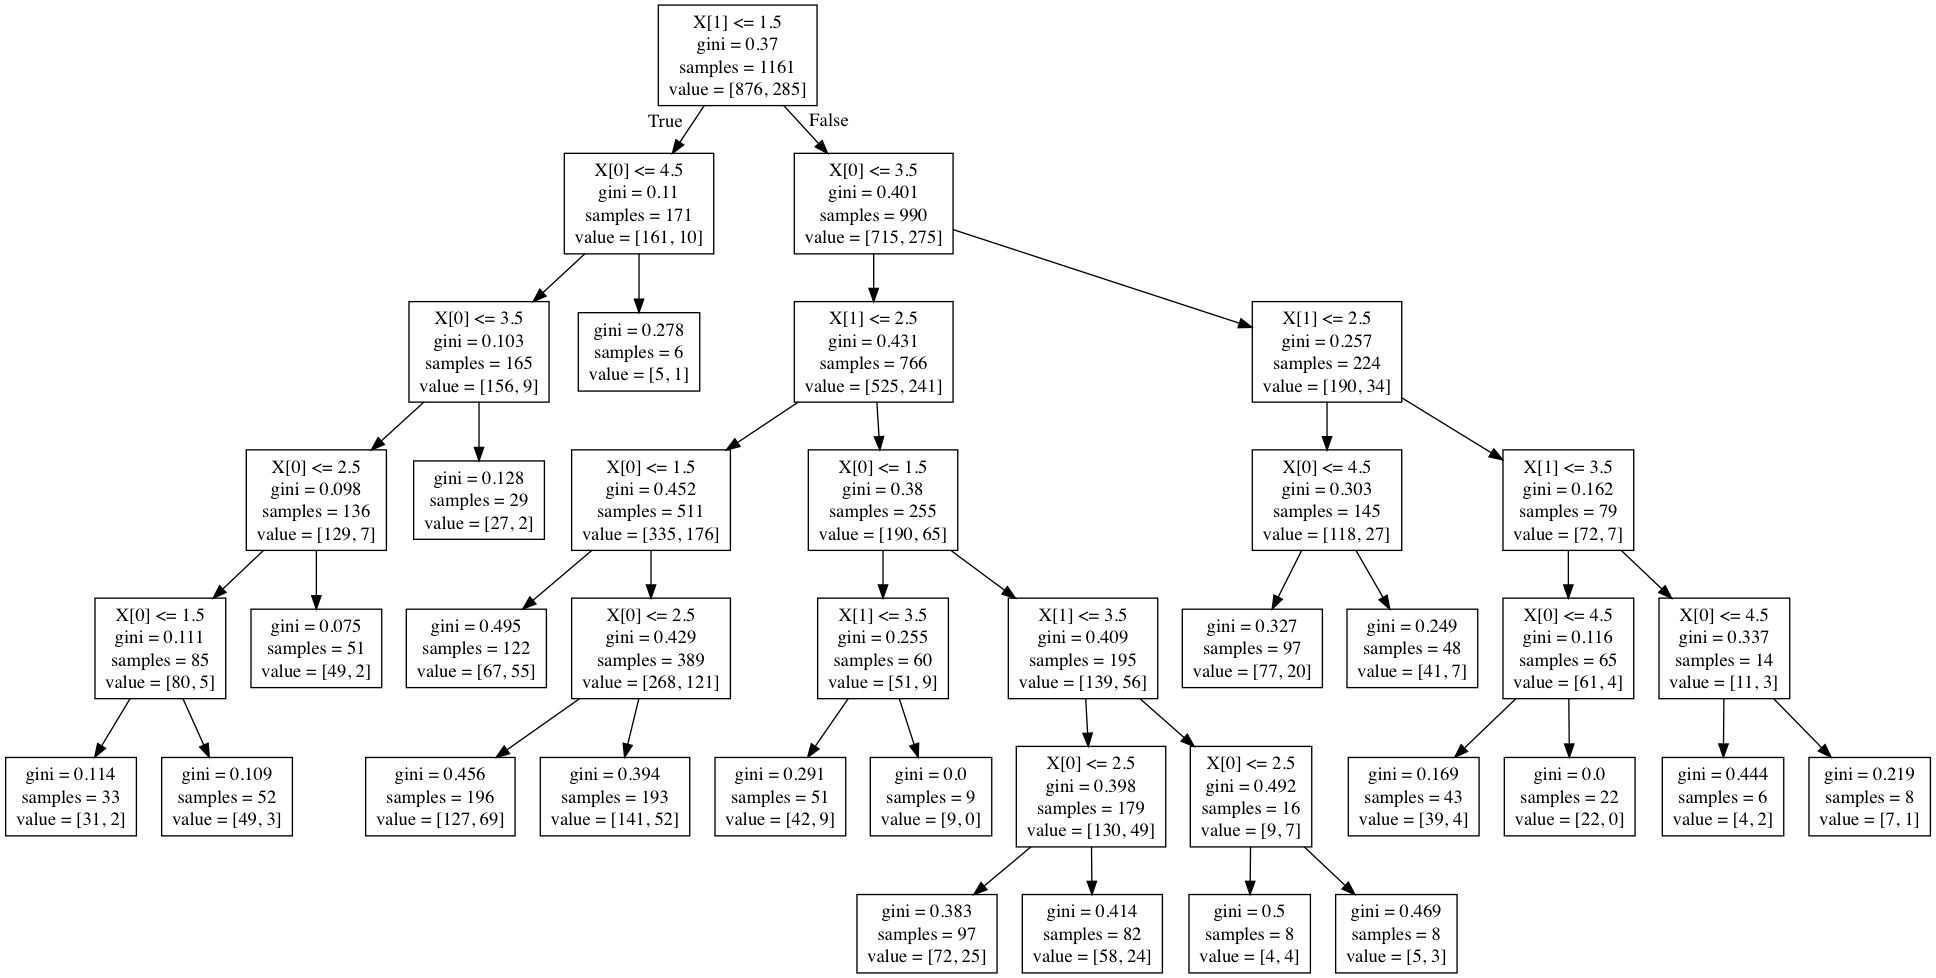

In [156]:
# Classification
#D isplaying the decision tree
from sklearn import tree
#from StringIO import StringIO

from io import StringIO
#from StringIO import StringIO 

from IPython.display import Image
out = StringIO()

# This is the code to export the decision tree image in the folder where the notebook is lockated : out_file = None
image_tree = tree.export_graphviz(classifier, out_file = None)
graph = graphviz.Source(image_tree)
graph.render("decision tree for the assignment")

# This is to code to have the decision tree image in the notbook :
tree.export_graphviz(classifier, out_file=out)

import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())



Decision tree analysis was performed to test nonlinear relationships among a series of explanatory variables and a binary, categorical response variable (**US economy's situation**). All possible separations (categorical) or cut points (quantitative) are tested. For the present analyses, the entropy “goodness of split” criterion was used to grow the tree and a cost complexity algorithm was used for pruning the full tree into a final subtree.

The following explanatory variables were included as possible contributors to a classification tree model evaluating the US economy's situation (my response variable), the predictors are the interest in politics and self identification to a political party's philosophy. In the decision tree, X[0] is our first explanatory variable (interest in politics) and X[1], our second explanatory variable (political afiliation).

The political afficilation was the first variable to separate the sample into two subgroups. At the top we see the most informative condition is Poltical affiliation <= 1.5. If this condition is true, we take the left branch to get to the 183 samples of value = [170; 13]. This means there are 170 examples of those who identify as "democrats" are interested in politics.
The total model classified 74% of the sample correctly.